# Administrative Stuff

In [1]:
pip install category_encoders

In [2]:
# Importing libraries as needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Python & Pandas versions for reproducibility's sake

import sys
print('Python version:', sys.version)
print('Pandas version:', pd.__version__)

Python version: 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Pandas version: 1.0.3


# Exploratory Data Analysis and Cleaning

In [0]:
# Defining df

df = pd.read_csv('https://raw.githubusercontent.com/karlmanalo/Lambda-School-Unit-1-Project/master/combine_data_since_2000_PROCESSED_2018-04-26.csv')

In [0]:
# Creating target 'Drafted'

df['Drafted'] = [0 if np.isnan(x) else 1 for x in df['Pick']]

In [0]:
# Correcting errors in positions

df.loc[df['Player'] == 'Martinas Rankin', 'Pos'] = 'OT'
df.loc[df['Player'] == 'Cole Madison', 'Pos'] = 'G'
df.loc[df['Player'] == 'Minkah Fitzpatrick', 'Pos'] = 'S'
df.loc[df['Player'] == 'Quenton Meeks', 'Pos'] = 'CB'

In [0]:
# Defining majority class, defining y_pred as array of majority class

majority_class = df['Drafted'].mode()[0]

y_pred = [majority_class] * len(df['Drafted'])

In [8]:
# Importing and calculating accuracy score of majority class

from sklearn.metrics import accuracy_score

accuracy_maj_class = accuracy_score(df['Drafted'], y_pred)

print(f'The baseline accuracy of guessing the majority class for every prediction would be {accuracy_maj_class}.')

The baseline accuracy of guessing the majority class for every prediction would be 0.6011579285944033.


In [0]:
# Defining function to wrangle data set.

def wrangle(X):
  
  # Creating copy of X to prevent SettingWithCopy warnings
  X = X.copy()

  # Dropping unusable_variance
  unusable_variance = ['Player', 'Pfr_ID']
  X = X.drop(columns=unusable_variance)

  # Dropping columns with data leakage
  data_leakage = ['AV', 'Team', 'Round', 'Pick']
  X = X.drop(columns=data_leakage)

  return X

In [10]:
# Wrangling df

df = wrangle(df)
df.head()

,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Drafted
0,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,1
1,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,1
2,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,1
3,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,0
4,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,1


In [0]:
# Reducing the total number of positions by grouping similar skill sets
# to improve accuracy of model

df.loc[df['Pos'] == 'OG', 'Pos'] = 'G'
df.loc[df['Pos'] == 'NT', 'Pos'] = 'DT'
df.loc[df['Pos'] == 'EDGE', 'Pos'] = 'DE'
df.loc[df['Pos'] == 'ILB', 'Pos'] = 'LB'
df.loc[df['Pos'] == 'OLB', 'Pos'] = 'LB'
df.loc[df['Pos'] == 'SS', 'Pos'] = 'S'
df.loc[df['Pos'] == 'FS', 'Pos'] = 'S'
df.loc[df['Pos'] == 'LS', 'Pos'] = 'S'

# Overall Visualization of Drafted vs Undrafted Players

In [0]:
# Making graphs visible and a bit more aesthetically pleasing

%matplotlib inline
plt.rcParams['figure.dpi'] = 144

In [0]:
# Importing and instantiating imputer

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

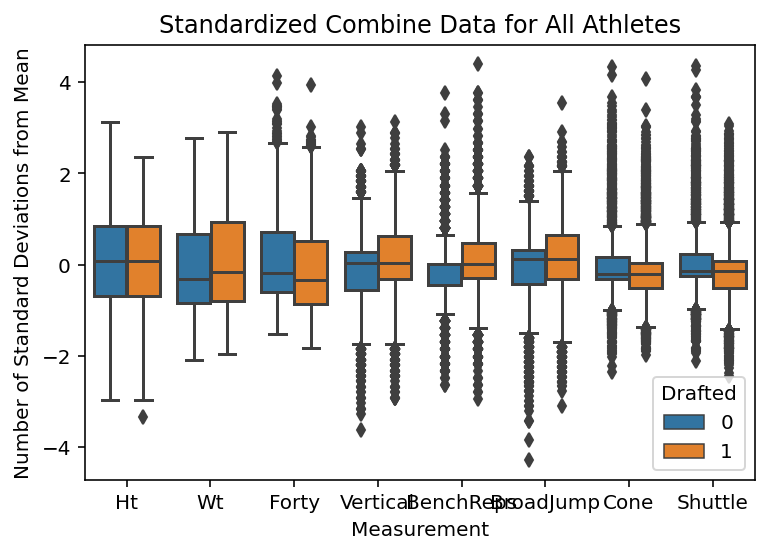

In [14]:
# Creating visualization for standardized NFL Combine data, comparing drafted
# athletes to undrafted athletes.

overall_stats = df.describe()

df_overall = df.drop(columns='Pos')

df_overall_imputed = imputer.fit_transform(df_overall)
df_overall_imputed = pd.DataFrame(df_overall_imputed, columns=df_overall.columns)

for i in range(8):
  mean = overall_stats.iloc[1, i]
  std = overall_stats.iloc[2, i]
  df_overall_imputed.iloc[:,i:(i + 1)] = (df_overall_imputed.dropna().iloc[:,i:(i + 1)] - mean) / std

df1_overall_sns = df_overall_imputed[df_overall_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_overall_sns = df_overall_imputed[df_overall_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_overall_sns, df2_overall_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf,                 
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized Combine Data for All Athletes')
plt.savefig('overall_std')
plt.show()

# Splitting Dataframe Into Subsets By Position

In [0]:
# Splitting athletes into appropriate position groups

df_QB = df[df['Pos'] == 'QB']

df_RB = df[(df['Pos'] == 'RB')]

df_FB = df[df['Pos'] == 'FB']

df_WR = df[df['Pos'] == 'WR']

df_TE = df[df['Pos'] == 'TE']

df_G = df[(df['Pos'] == 'OG') | (df['Pos'] == 'G')]

df_T = df[(df['Pos'] == 'OT')]

df_C = df[(df['Pos'] == 'C')]

df_DT = df[(df['Pos'] == 'DT') | (df['Pos'] == 'NT')]

df_DE = df[(df['Pos'] == 'DE') | (df['Pos'] == 'EDGE')]

df_LB = df[(df['Pos'] == 'LB') | (df['Pos'] == 'ILB') | 
                   (df['Pos'] == 'OLB')]

df_S = df[(df['Pos'] == 'SS') | (df['Pos'] == 'FS') | 
                   (df['Pos'] == 'LS') | (df['Pos'] == 'S')]

df_CB = df[(df['Pos'] == 'CB')]

df_P = df[(df['Pos'] == 'P')]

df_K = df[(df['Pos'] == 'K')]

In [0]:
# Importing train_test_split

from sklearn.model_selection import train_test_split

In [0]:
def split(X):
  '''Splits subsets into train/val/test sets'''

  # Splitting into train/val/test sets
  X_train, X_test = train_test_split(X, stratify=X['Drafted'], test_size=0.2, random_state=7)
  X_train, X_val = train_test_split(X_train, stratify=X_train['Drafted'], test_size=0.2, random_state=7)

  # X_train = X_train.drop(columns='Pos')
  # X_val = X_val.drop(columns='Pos')
  # X_test = X_test.drop(columns='Pos')

  return X_train, X_val, X_test

In [0]:
df_QB_train = split(df_QB)[0]
df_QB_val = split(df_QB)[1]
df_QB_test = split(df_QB)[2]

In [0]:
#@title Splitting RBs (click to expand)

df_RB_train = split(df_RB)[0]
df_RB_val = split(df_RB)[1]
df_RB_test = split(df_RB)[2]

In [0]:
#@title Splitting FBs (click to expand)
df_FB_train = split(df_FB)[0]
df_FB_val = split(df_FB)[1]
df_FB_test = split(df_FB)[2]

In [0]:
#@title Splitting WRs (click to expand)

df_WR_train = split(df_WR)[0]
df_WR_val = split(df_WR)[1]
df_WR_test = split(df_WR)[2]

In [0]:
#@title Splitting TEs (click to expand)
df_TE_train = split(df_TE)[0]
df_TE_val = split(df_TE)[1]
df_TE_test = split(df_TE)[2]

In [0]:
#@title Splitting Gs (click to expand)
df_G_train = split(df_G)[0]
df_G_val = split(df_G)[1]
df_G_test = split(df_G)[2]

In [0]:
#@title Splitting Ts (click to expand)
df_T_train = split(df_T)[0]
df_T_val = split(df_T)[1]
df_T_test = split(df_T)[2]

In [0]:
#@title Splitting Cs (click to expand)
df_C_train = split(df_C)[0]
df_C_val = split(df_C)[1]
df_C_test = split(df_C)[2]

In [0]:
#@title Splitting DTs (click to expand)
df_DT_train = split(df_DT)[0]
df_DT_val = split(df_DT)[1]
df_DT_test = split(df_DT)[2]

In [0]:
#@title Splitting DEs (click to expand)
df_DE_train = split(df_DE)[0]
df_DE_val = split(df_DE)[1]
df_DE_test = split(df_DE)[2]

In [0]:
#@title Splitting LBs (click to expand)
df_LB_train = split(df_LB)[0]
df_LB_val = split(df_LB)[1]
df_LB_test = split(df_LB)[2]

In [0]:
#@title Splitting CBs (click to expand)
df_CB_train = split(df_CB)[0]
df_CB_val = split(df_CB)[1]
df_CB_test = split(df_CB)[2]

In [0]:
#@title Splitting Ss (click to expand)
df_S_train = split(df_S)[0]
df_S_val = split(df_S)[1]
df_S_test = split(df_S)[2]

In [0]:
#@title Splitting Ps (click to expand)
df_P_train = split(df_P)[0]
df_P_val = split(df_P)[1]
df_P_test = split(df_P)[2]

In [0]:
#@title Splitting Ks (click to expand)
df_K_train = split(df_K)[0]
df_K_val = split(df_K)[1]
df_K_test = split(df_K)[2]

# Creating Visualizations for Subset Position Groups

In [0]:
# Creating copy of .describe() of dataframe

QB_stats = df_QB.describe()

In [0]:
# Dropping position

df_QB = df_QB.drop(columns='Pos')

In [0]:
# Imputing missing data

df_QB_imputed = imputer.fit_transform(df_QB)
df_QB_imputed = pd.DataFrame(df_QB_imputed, columns=df_QB.columns)

In [0]:
# Replacing all values with calculation of how number of standard deviations
# away from mean

for i in range(8):
  mean = QB_stats.iloc[1, i]
  std = QB_stats.iloc[2, i]
  df_QB_imputed.iloc[:,i:(i + 1)] =  (df_QB_imputed.dropna().iloc[:,i:(i + 1)] - mean) / std

In [0]:
# Prepping data to visualize

df1_QB_sns = df_QB_imputed[df_QB_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_QB_sns = df_QB_imputed[df_QB_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_QB_sns, df2_QB_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

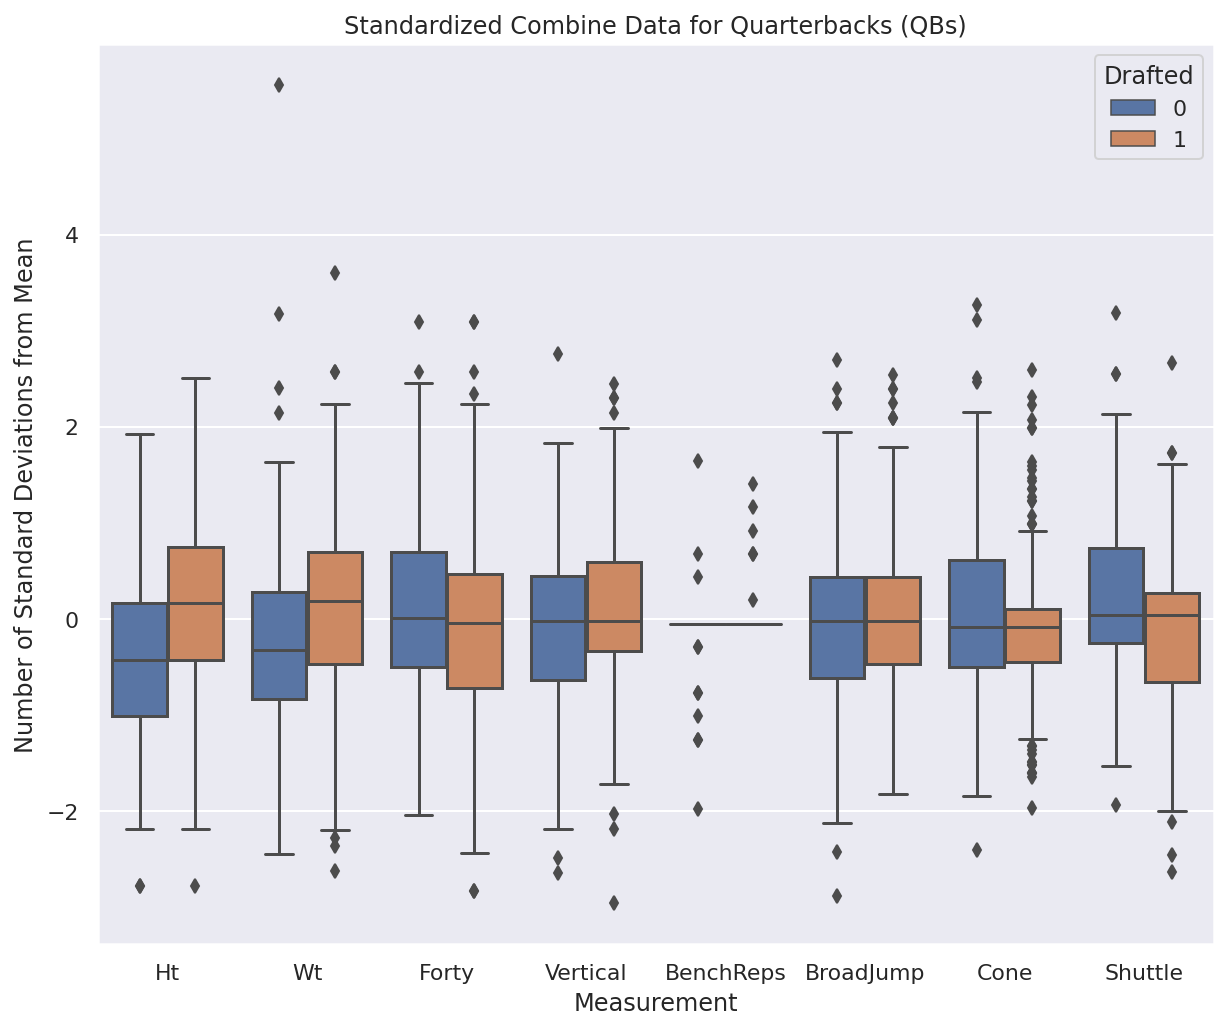

In [38]:
# Creating visualization, saving file externally

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf,                 
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized Combine Data for Quarterbacks (QBs)')
plt.savefig('qb_std')
plt.show()

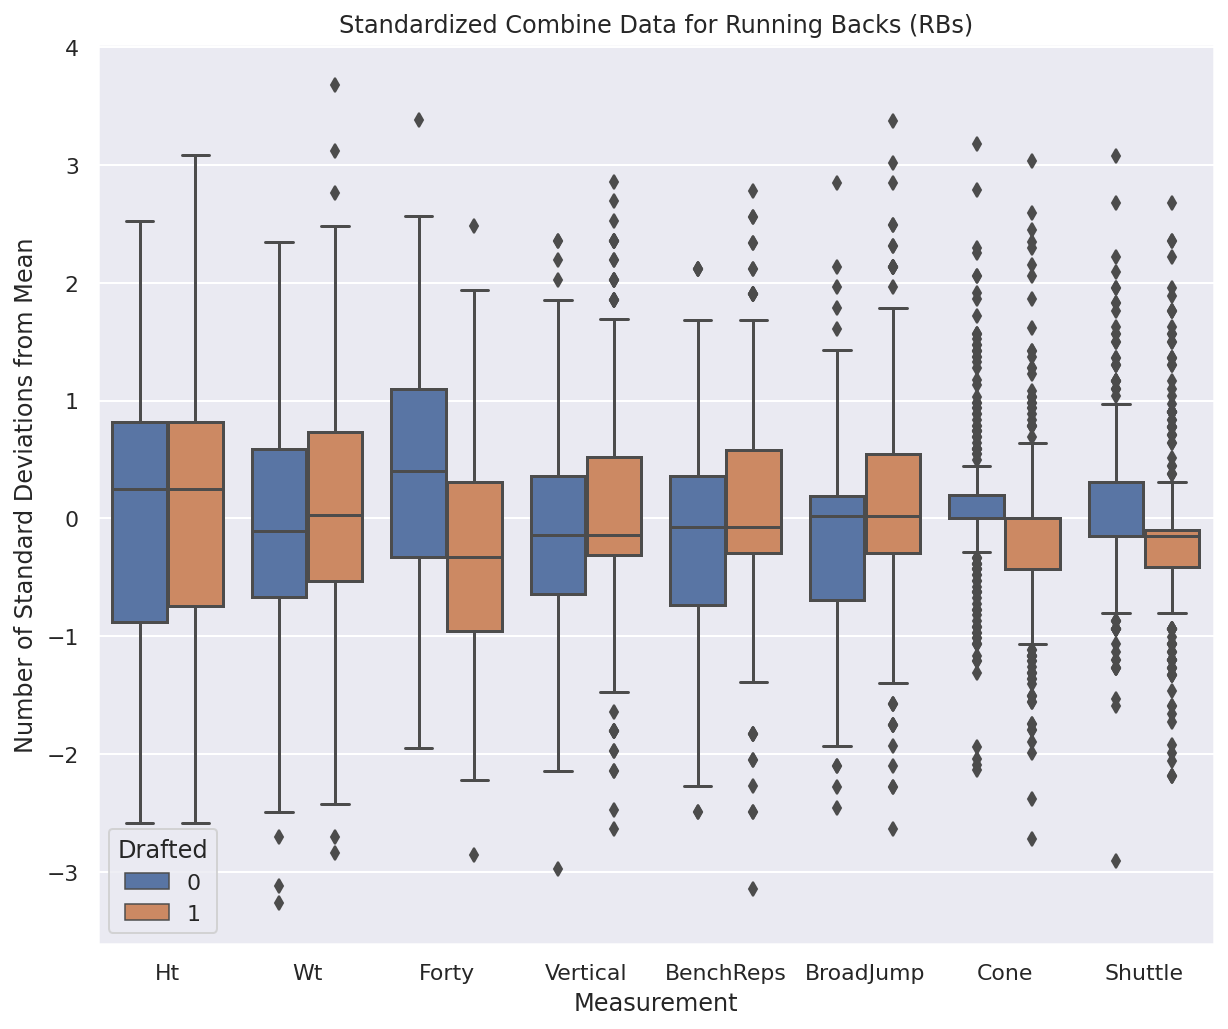

In [39]:
#@title Standardized Combine Data for RBs Boxplot (click to expand)

RB_stats = df_RB.describe()

df_RB = df_RB.drop(columns='Pos')

df_RB_imputed = imputer.fit_transform(df_RB)
df_RB_imputed = pd.DataFrame(df_RB_imputed, columns=df_RB.columns)

for i in range(8):
  mean = RB_stats.iloc[1, i]
  std = RB_stats.iloc[2, i]
  df_RB_imputed.iloc[:,i:(i + 1)] =  (df_RB_imputed.dropna().iloc[:,i:(i + 1)] - mean) / std

df1_RB_sns = df_RB_imputed[df_RB_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_RB_sns = df_RB_imputed[df_RB_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_RB_sns, df2_RB_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized Combine Data for Running Backs (RBs)')
plt.show()

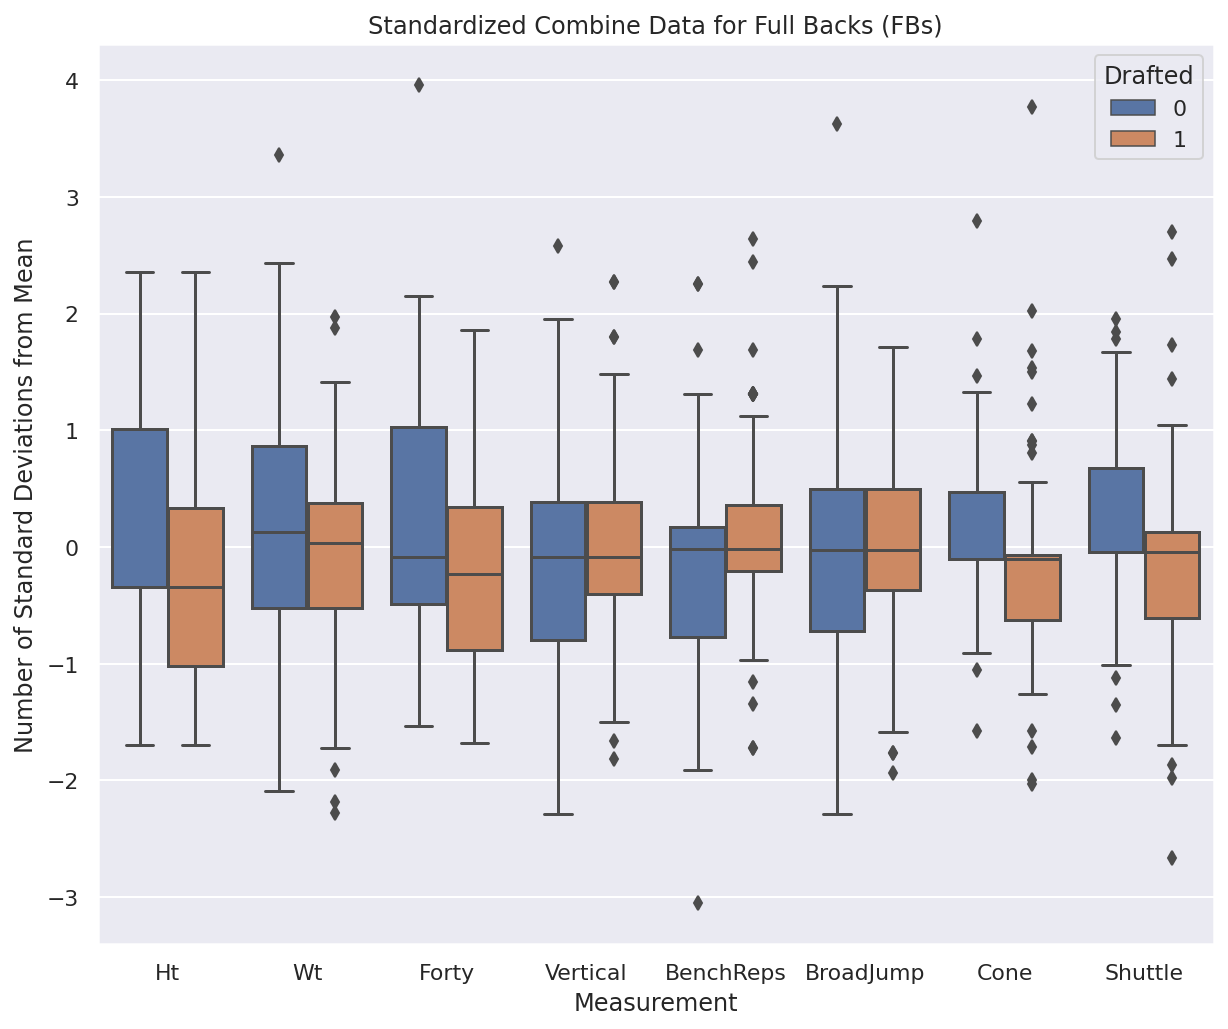

In [40]:
#@title Standardized Combine Data for FBs Boxplot (click to expand)

FB_stats = df_FB.describe()

df_FB = df_FB.drop(columns='Pos')

df_FB_imputed = imputer.fit_transform(df_FB)
df_FB_imputed = pd.DataFrame(df_FB_imputed, columns=df_FB.columns)

for i in range(8):
  mean = FB_stats.iloc[1, i]
  std = FB_stats.iloc[2, i]
  df_FB_imputed.iloc[:,i:(i + 1)] =  (df_FB_imputed.dropna().iloc[:,i:(i + 1)] - mean) / std

df1_FB_sns = df_FB_imputed[df_FB_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_FB_sns = df_FB_imputed[df_FB_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_FB_sns, df2_FB_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized Combine Data for Full Backs (FBs)')
plt.show()

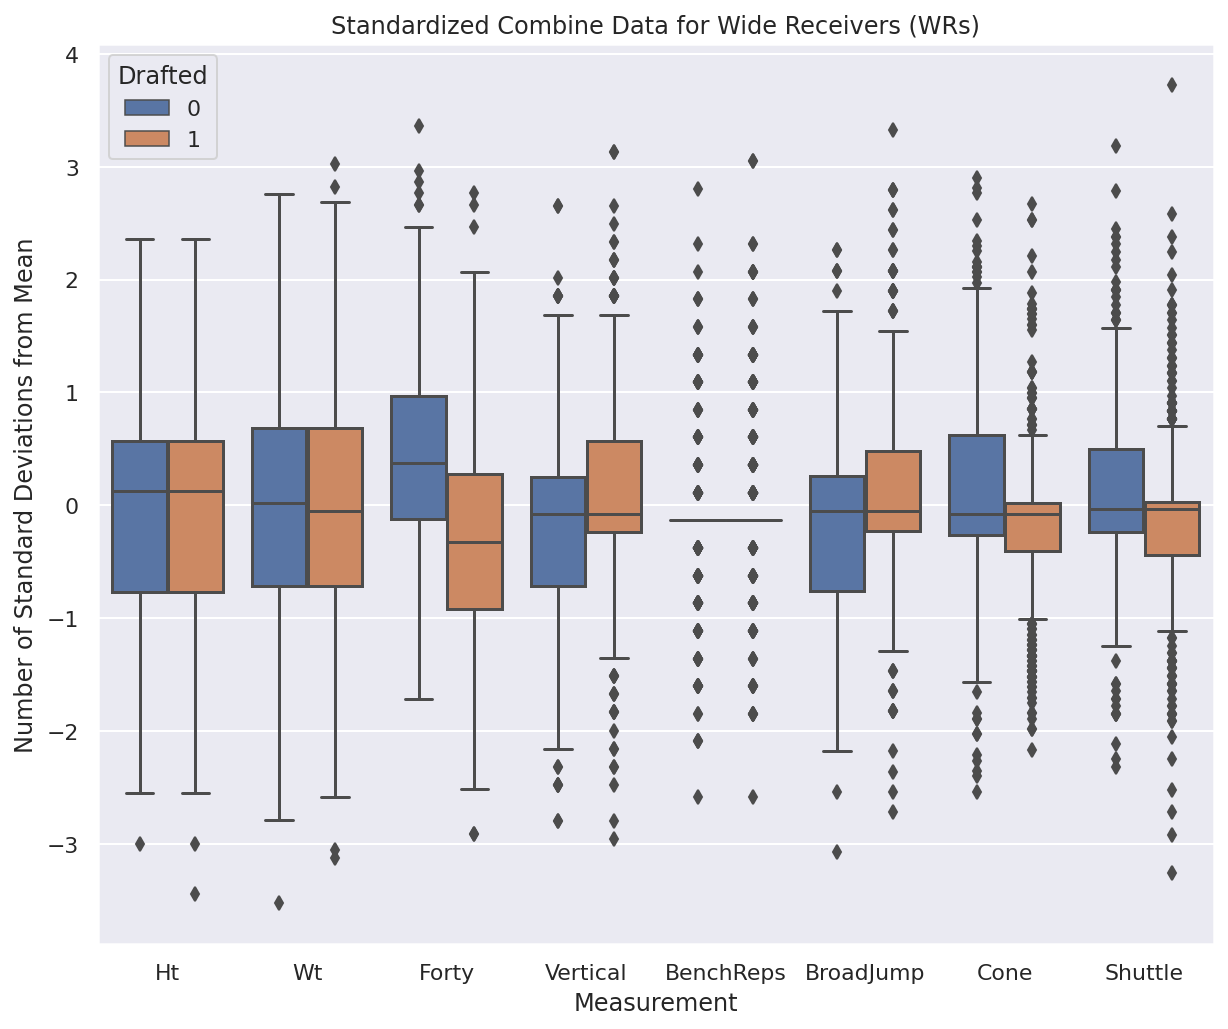

In [41]:
#@title Standardized Combine Data for WRs Boxplot (click to expand)

WR_stats = df_WR.describe()

df_WR = df_WR.drop(columns='Pos')

df_WR_imputed = imputer.fit_transform(df_WR)
df_WR_imputed = pd.DataFrame(df_WR_imputed, columns=df_WR.columns)

for i in range(8):
  mean = WR_stats.iloc[1, i]
  std = WR_stats.iloc[2, i]
  df_WR_imputed.iloc[:,i:(i + 1)] =  (df_WR_imputed.dropna().iloc[:,i:(i + 1)] - mean) / std

df1_WR_sns = df_WR_imputed[df_WR_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_WR_sns = df_WR_imputed[df_WR_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_WR_sns, df2_WR_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized Combine Data for Wide Receivers (WRs)')
plt.show()

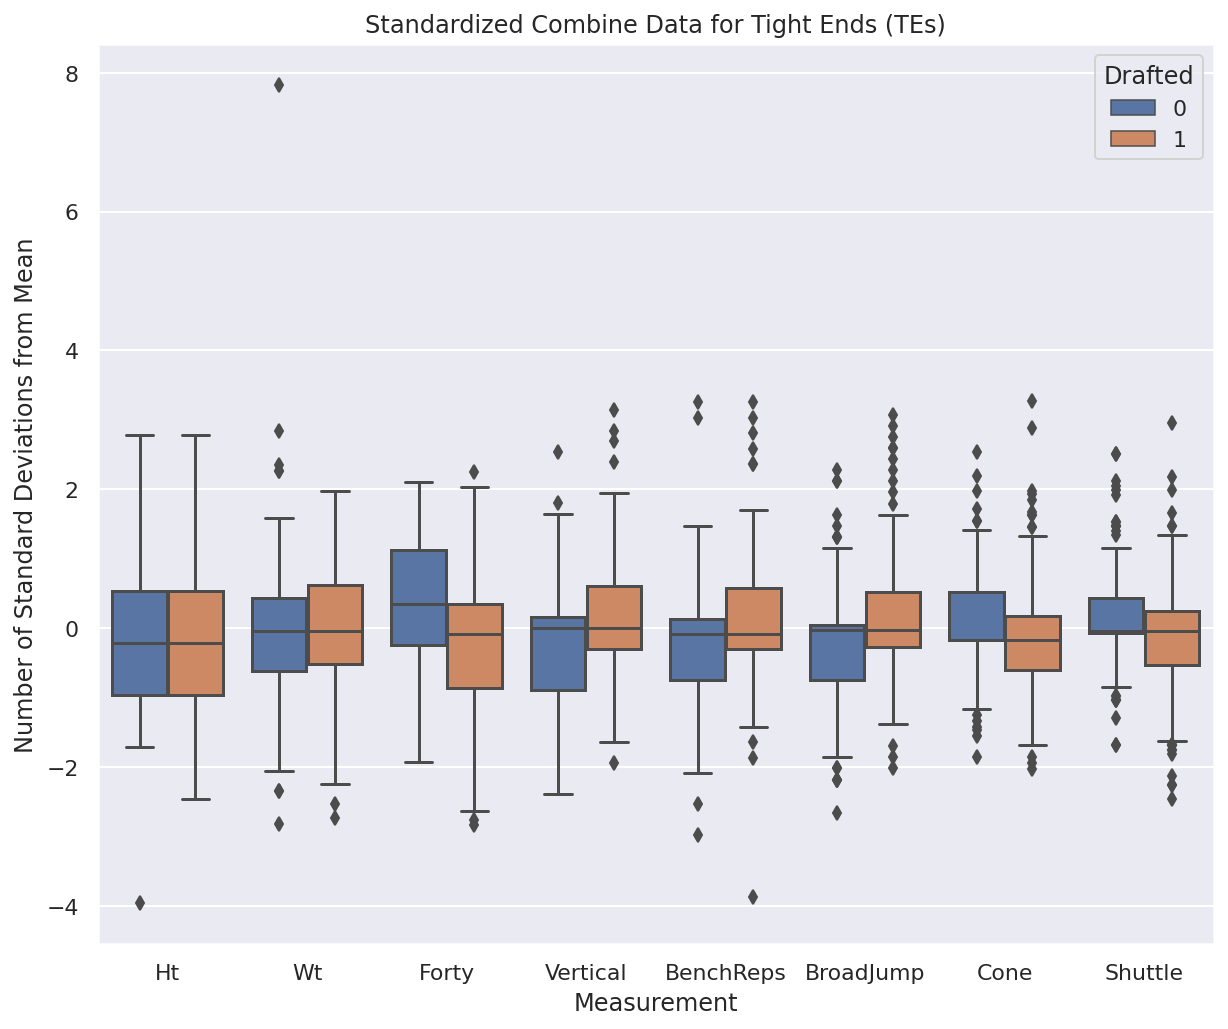

In [42]:
#@title Standardized Combine Data for TEs Boxplot (click to expand)

TE_stats = df_TE.describe()

df_TE = df_TE.drop(columns='Pos')

df_TE_imputed = imputer.fit_transform(df_TE)
df_TE_imputed = pd.DataFrame(df_TE_imputed, columns=df_TE.columns)

for i in range(8):
  mean = TE_stats.iloc[1, i]
  std = TE_stats.iloc[2, i]
  df_TE_imputed.iloc[:,i:(i + 1)] =  (df_TE_imputed.dropna().iloc[:,i:(i + 1)] - mean) / std

df1_TE_sns = df_TE_imputed[df_TE_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_TE_sns = df_TE_imputed[df_TE_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_TE_sns, df2_TE_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized Combine Data for Tight Ends (TEs)')
plt.show()

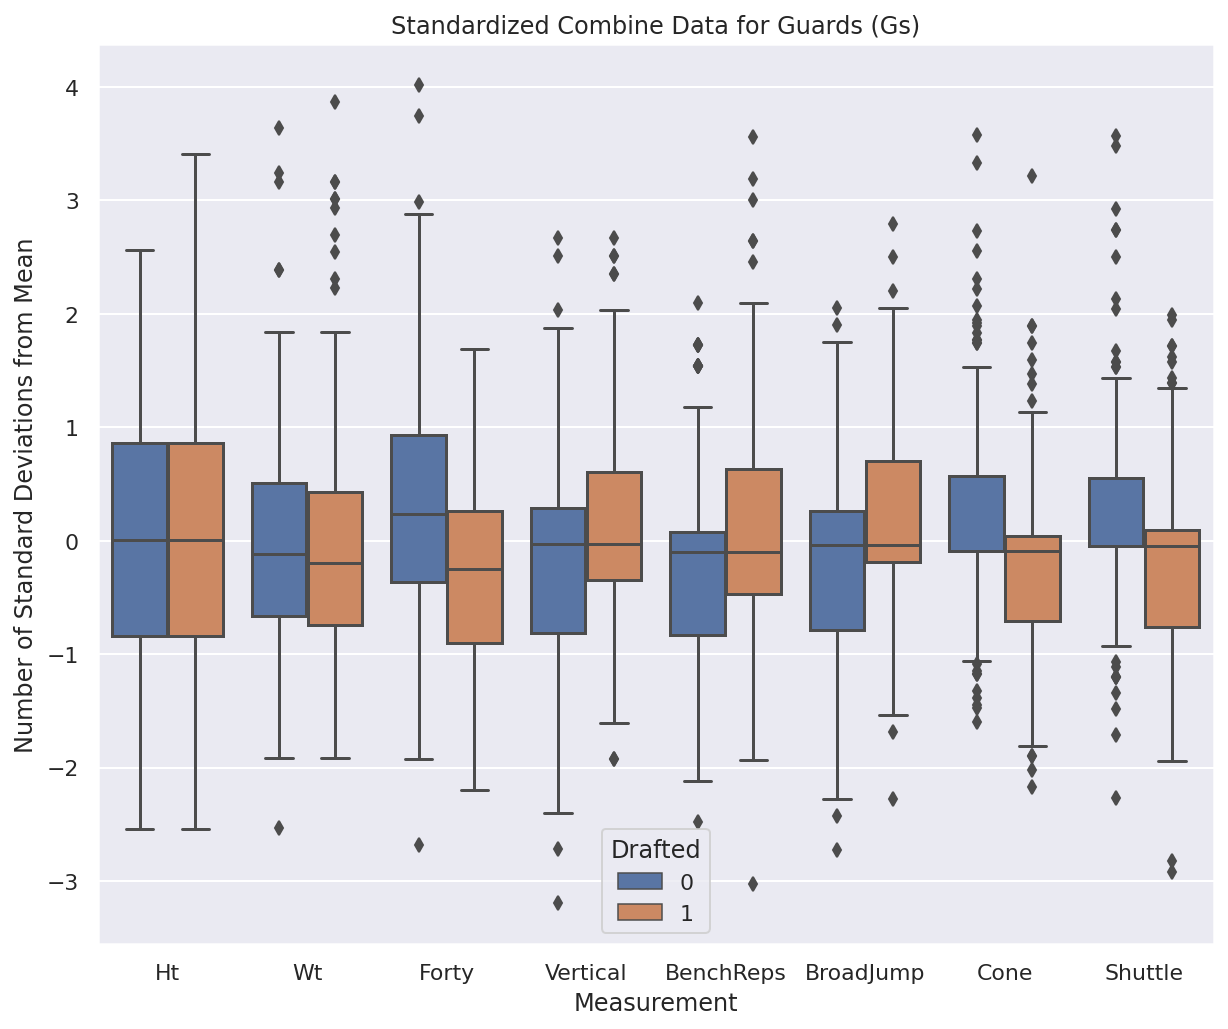

In [43]:
#@title Standardized Combine Data for Gs Boxplot (click to expand)

G_stats = df_G.describe()

df_G = df_G.drop(columns='Pos')

df_G_imputed = imputer.fit_transform(df_G)
df_G_imputed = pd.DataFrame(df_G_imputed, columns=df_G.columns)

for i in range(8):
  mean = G_stats.iloc[1, i]
  std = G_stats.iloc[2, i]
  df_G_imputed.iloc[:,i:(i + 1)] =  (df_G_imputed.dropna().iloc[:,i:(i + 1)] - mean) / std

df1_G_sns = df_G_imputed[df_G_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_G_sns = df_G_imputed[df_G_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_G_sns, df2_G_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized Combine Data for Guards (Gs)')
plt.show()

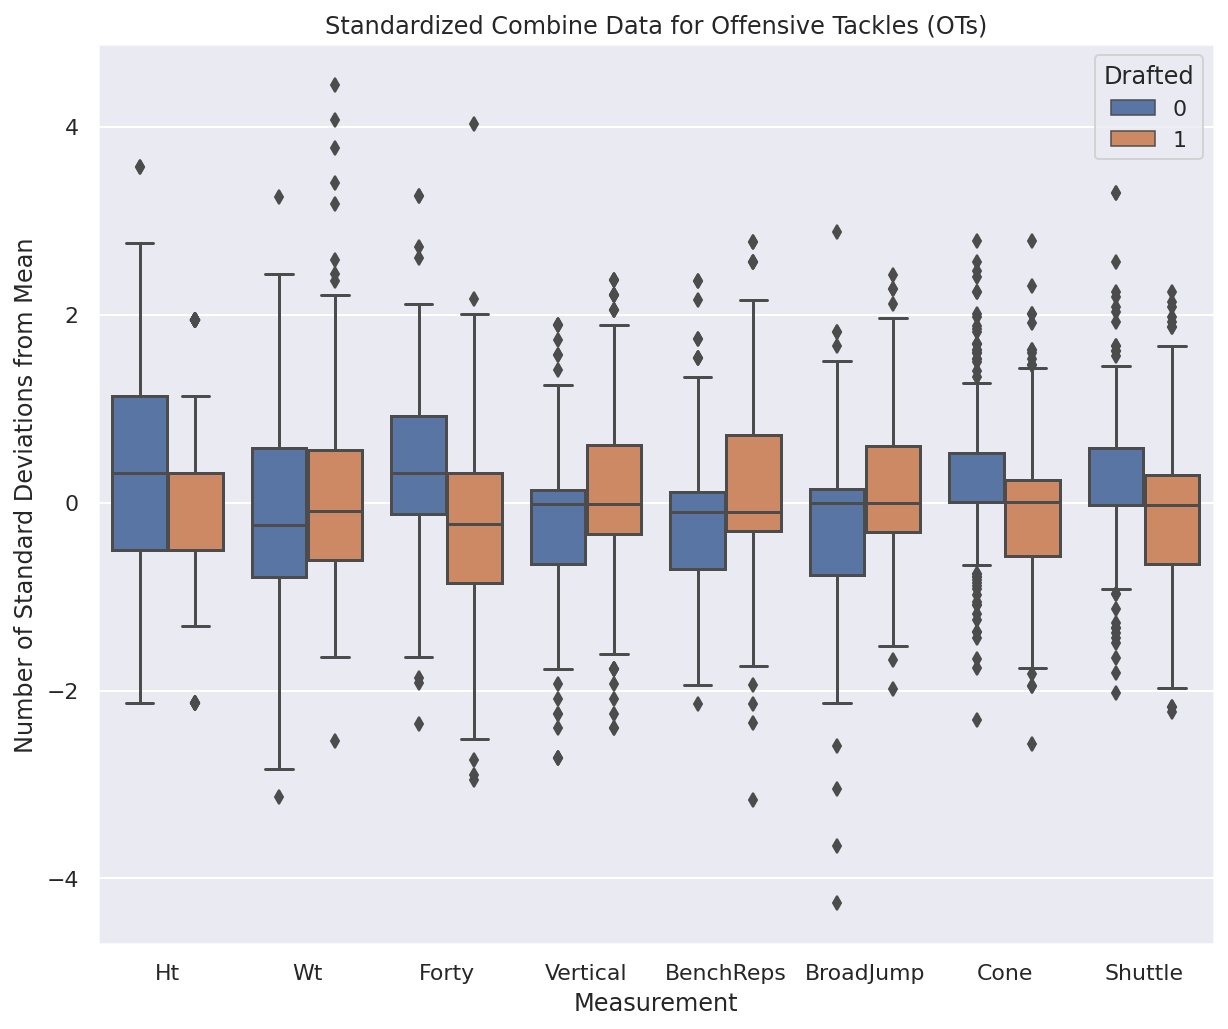

In [44]:
#@title Standardized Combine Data for Ts Boxplot (click to expand)

T_stats = df_T.describe()

df_T = df_T.drop(columns='Pos')

df_T_imputed = imputer.fit_transform(df_T)
df_T_imputed = pd.DataFrame(df_T_imputed, columns=df_T.columns)

for i in range(8):
  mean = T_stats.iloc[1, i]
  std = T_stats.iloc[2, i]
  df_T_imputed.iloc[:,i:(i + 1)] =  (df_T_imputed.dropna().iloc[:,i:(i + 1)] - mean) / std

df1_T_sns = df_T_imputed[df_T_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_T_sns = df_T_imputed[df_T_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_T_sns, df2_T_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized Combine Data for Offensive Tackles (OTs)')
plt.show()

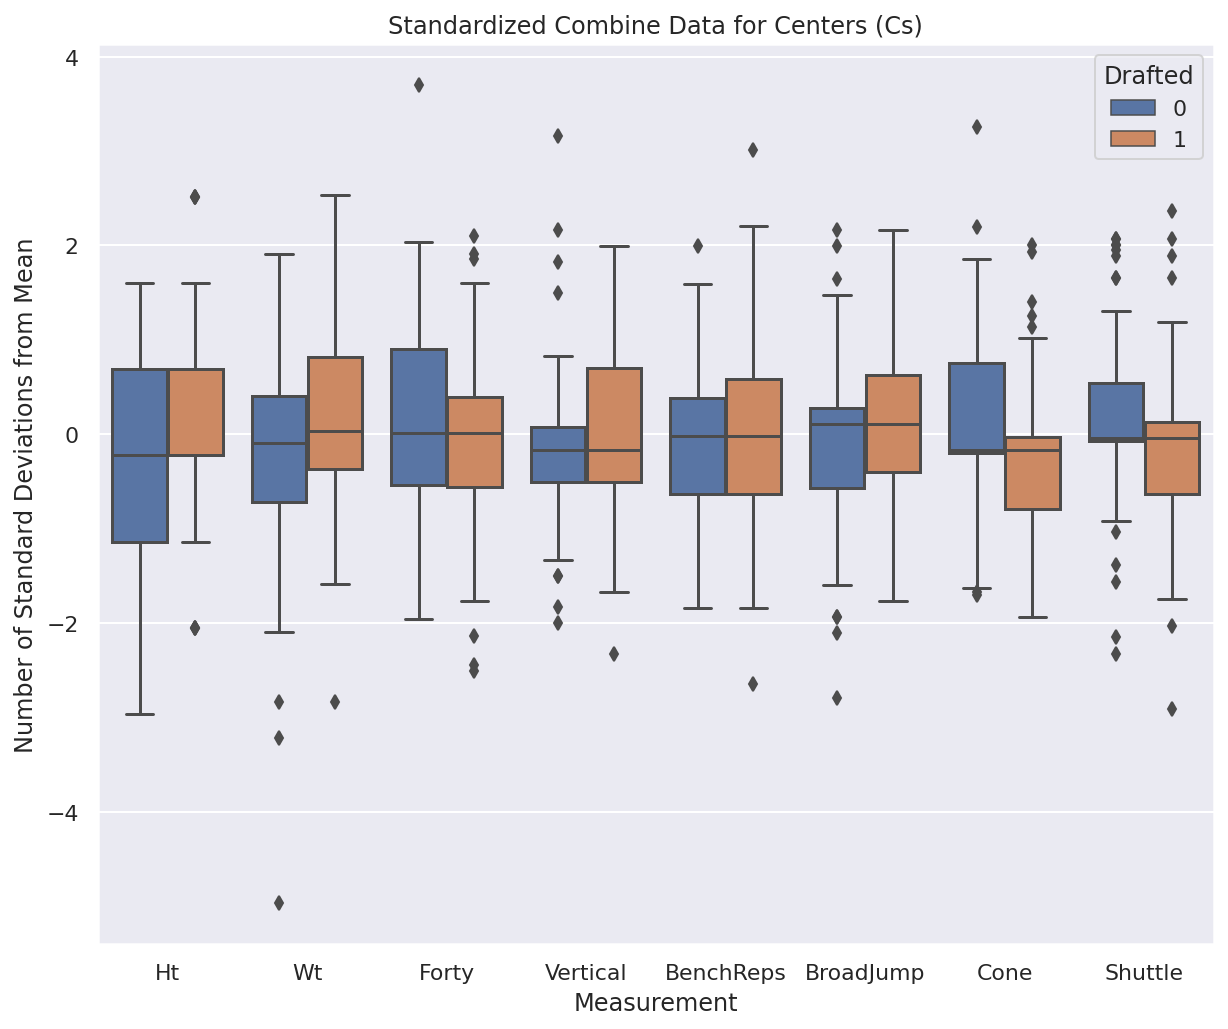

In [45]:
#@title Standardized Combine Data for Cs Boxplot (click to expand)

C_stats = df_C.describe()

df_C = df_C.drop(columns='Pos')

df_C_imputed = imputer.fit_transform(df_C)
df_C_imputed = pd.DataFrame(df_C_imputed, columns=df_C.columns)

for i in range(8):
  mean = C_stats.iloc[1, i]
  std = C_stats.iloc[2, i]
  df_C_imputed.iloc[:,i:(i + 1)] =  (df_C_imputed.dropna().iloc[:,i:(i + 1)] - mean) / std

df1_C_sns = df_C_imputed[df_C_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_C_sns = df_C_imputed[df_C_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_C_sns, df2_C_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized Combine Data for Centers (Cs)')
plt.show()

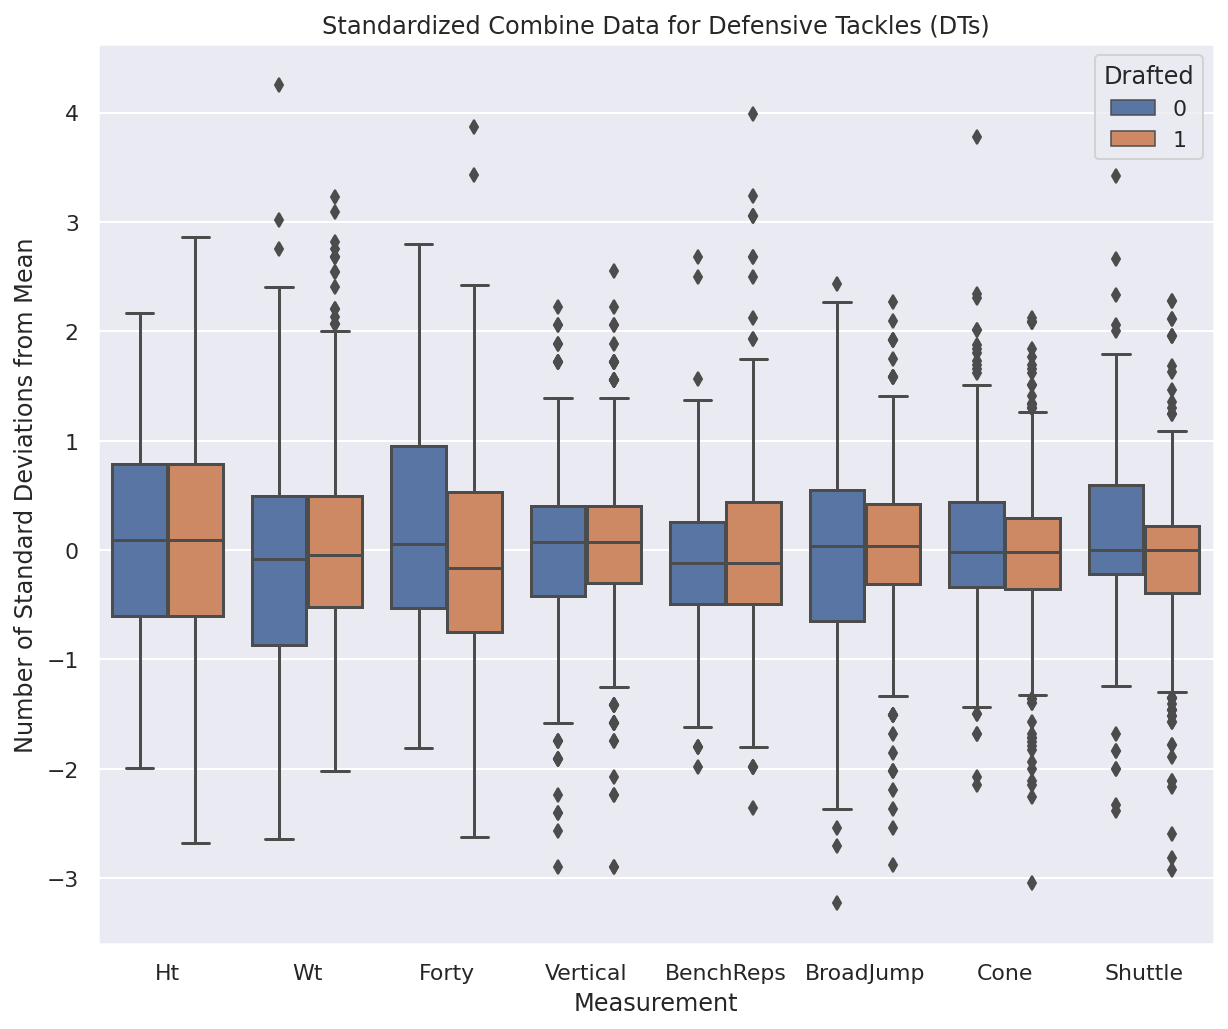

In [46]:
#@title Standardized Combine Data for DTs Boxplot (click to expand)

DT_stats = df_DT.describe()

df_DT = df_DT.drop(columns='Pos')

df_DT_imputed = imputer.fit_transform(df_DT)
df_DT_imputed = pd.DataFrame(df_DT_imputed, columns=df_DT.columns)

for i in range(8):
  mean = DT_stats.iloc[1, i]
  std = DT_stats.iloc[2, i]
  df_DT_imputed.iloc[:,i:(i + 1)] =  (df_DT_imputed.dropna().iloc[:,i:(i + 1)] - mean) / std

df1_DT_sns = df_DT_imputed[df_DT_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_DT_sns = df_DT_imputed[df_DT_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_DT_sns, df2_DT_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized Combine Data for Defensive Tackles (DTs)')
plt.show()

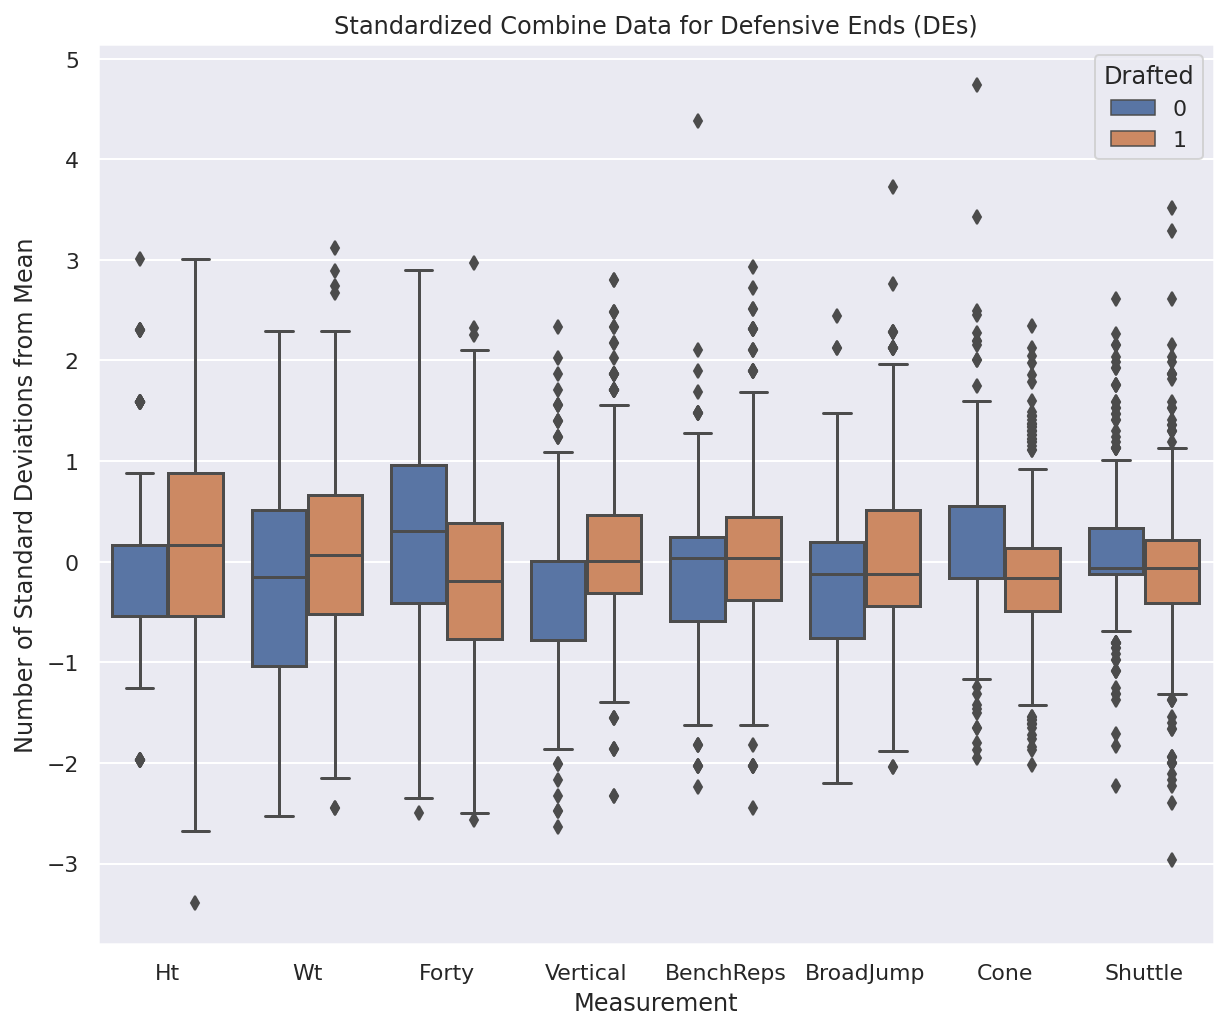

In [47]:
#@title Standardized Combine Data for DEs Boxplot (click to expand)

DE_stats = df_DE.describe()

df_DE = df_DE.drop(columns='Pos')

df_DE_imputed = imputer.fit_transform(df_DE)
df_DE_imputed = pd.DataFrame(df_DE_imputed, columns=df_DE.columns)

for i in range(8):
  mean = DE_stats.iloc[1, i]
  std = DE_stats.iloc[2, i]
  df_DE_imputed.iloc[:,i:(i + 1)] =  (df_DE_imputed.dropna().iloc[:,i:(i + 1)] - mean) / std

df1_DE_sns = df_DE_imputed[df_DE_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_DE_sns = df_DE_imputed[df_DE_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_DE_sns, df2_DE_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized Combine Data for Defensive Ends (DEs)')
plt.show()

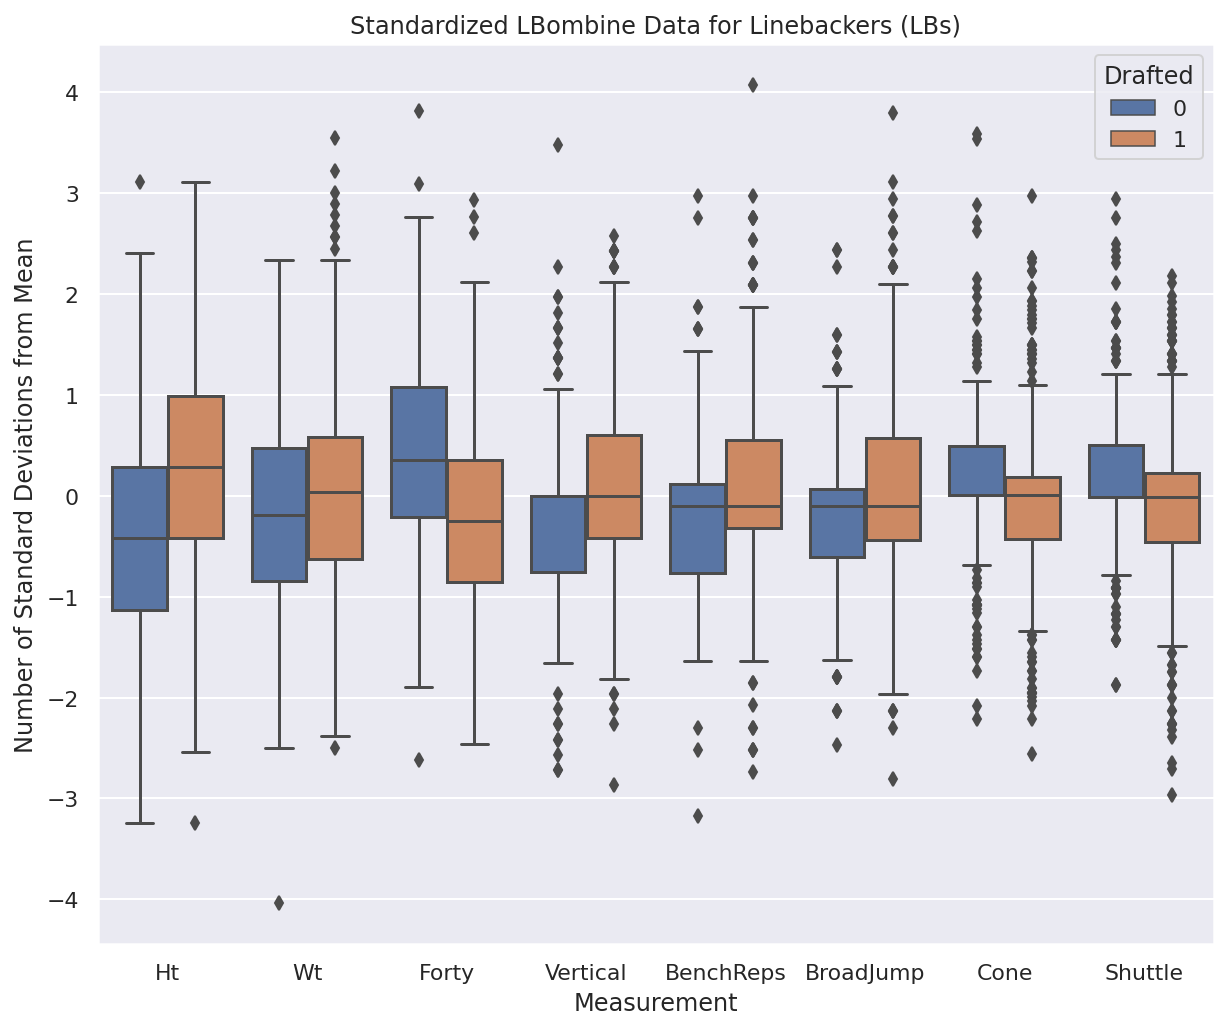

In [48]:
#@title Standardized Combine Data for LBs Boxplot (click to expand)

LB_stats = df_LB.describe()

df_LB = df_LB.drop(columns='Pos')

df_LB_imputed = imputer.fit_transform(df_LB)
df_LB_imputed = pd.DataFrame(df_LB_imputed, columns=df_LB.columns)

for i in range(8):
  mean = LB_stats.iloc[1, i]
  std = LB_stats.iloc[2, i]
  df_LB_imputed.iloc[:,i:(i + 1)] =  (df_LB_imputed.dropna().iloc[:,i:(i + 1)] - mean) / std

df1_LB_sns = df_LB_imputed[df_LB_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_LB_sns = df_LB_imputed[df_LB_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_LB_sns, df2_LB_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized LBombine Data for Linebackers (LBs)')
plt.show()

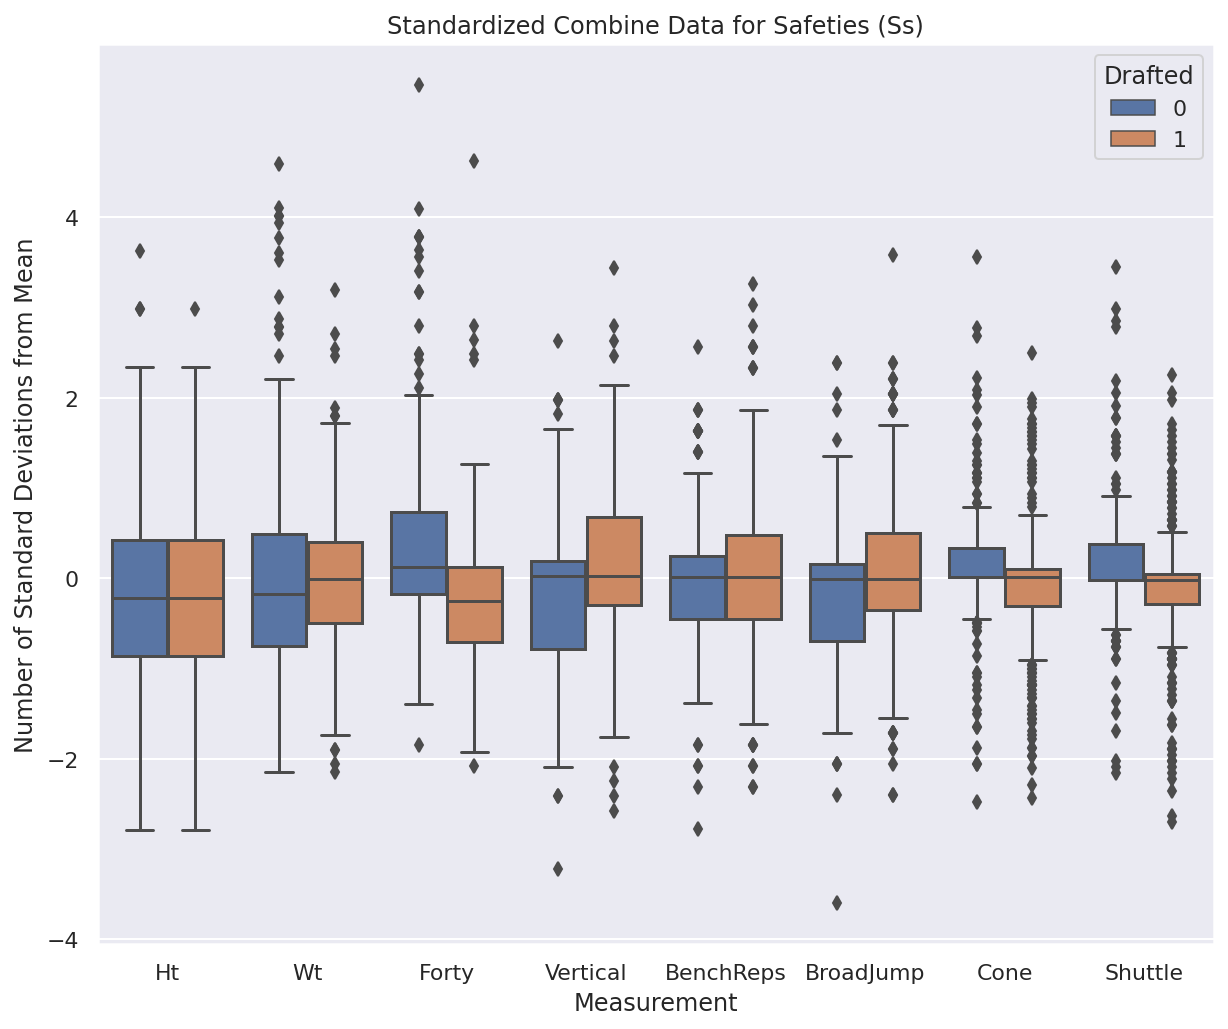

In [49]:
#@title Standardized Combine Data for Ss Boxplot (click to expand)

S_stats = df_S.describe()

df_S = df_S.drop(columns='Pos')

df_S_imputed = imputer.fit_transform(df_S)
df_S_imputed = pd.DataFrame(df_S_imputed, columns=df_S.columns)

for i in range(8):
  mean = S_stats.iloc[1, i]
  std = S_stats.iloc[2, i]
  df_S_imputed.iloc[:,i:(i + 1)] =  (df_S_imputed.dropna().iloc[:,i:(i + 1)] - mean) / std

df1_S_sns = df_S_imputed[df_S_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_S_sns = df_S_imputed[df_S_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_S_sns, df2_S_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized Combine Data for Safeties (Ss)')
plt.show()

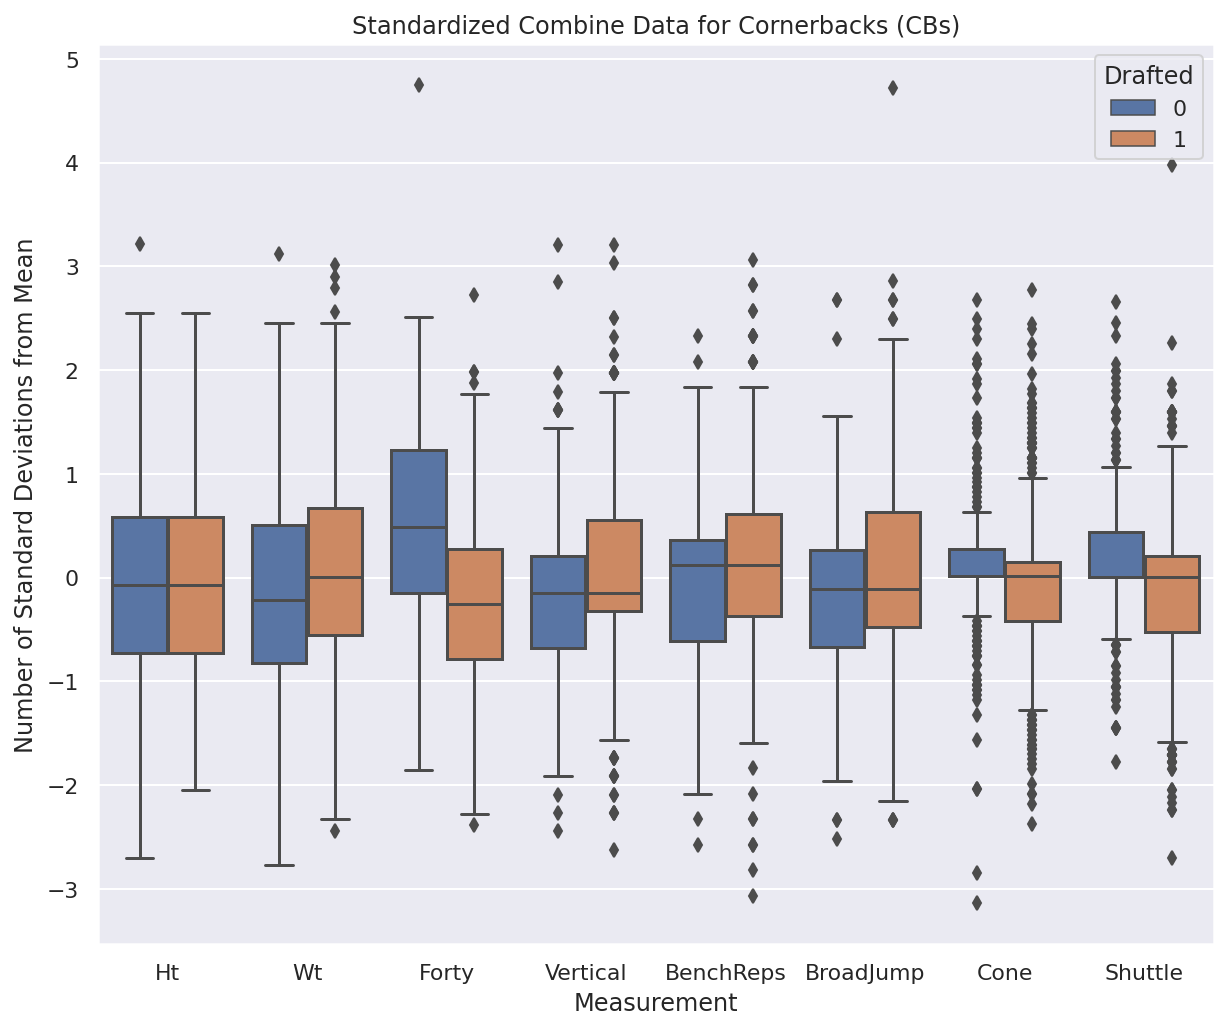

In [50]:
#@title Standardized Combine Data for CBs Boxplot (click to expand)

CB_stats = df_CB.describe()

df_CB = df_CB.drop(columns='Pos')

df_CB_imputed = imputer.fit_transform(df_CB)
df_CB_imputed = pd.DataFrame(df_CB_imputed, columns=df_CB.columns)

for i in range(8):
  mean = CB_stats.iloc[1, i]
  std = CB_stats.iloc[2, i]
  df_CB_imputed.iloc[:,i:(i + 1)] =  (df_CB_imputed.dropna().iloc[:,i:(i + 1)] - mean) / std

df1_CB_sns = df_CB_imputed[df_CB_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_CB_sns = df_CB_imputed[df_CB_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_CB_sns, df2_CB_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized Combine Data for Cornerbacks (CBs)')
plt.show()

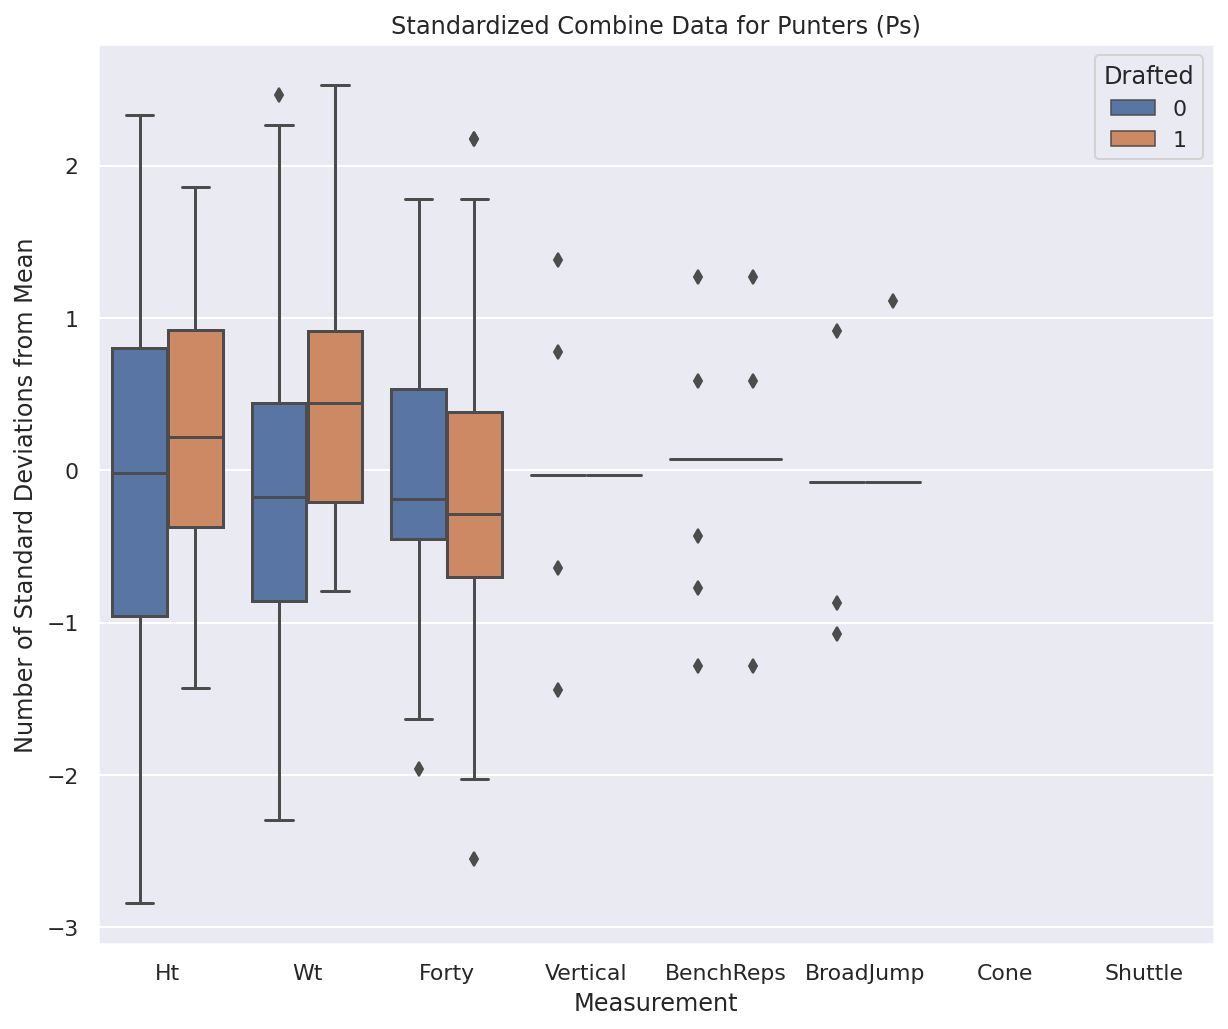

In [51]:
#@title Standardized Combine Data for Ps Boxplot (click to expand)

P_stats = df_P.describe()

df_P = df_P.drop(columns='Pos')

df_P_imputed = imputer.fit_transform(df_P)
df_P_imputed = pd.DataFrame(df_P_imputed, columns=df_P.columns)

for i in range(8):
  mean = P_stats.iloc[1, i]
  std = P_stats.iloc[2, i]
  df_P_imputed.iloc[:,i:(i + 1)] =  (df_P_imputed.dropna().iloc[:,i:(i + 1)] - mean) / std

df1_P_sns = df_P_imputed[df_P_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_P_sns = df_P_imputed[df_P_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_P_sns, df2_P_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized Combine Data for Punters (Ps)')
plt.show()

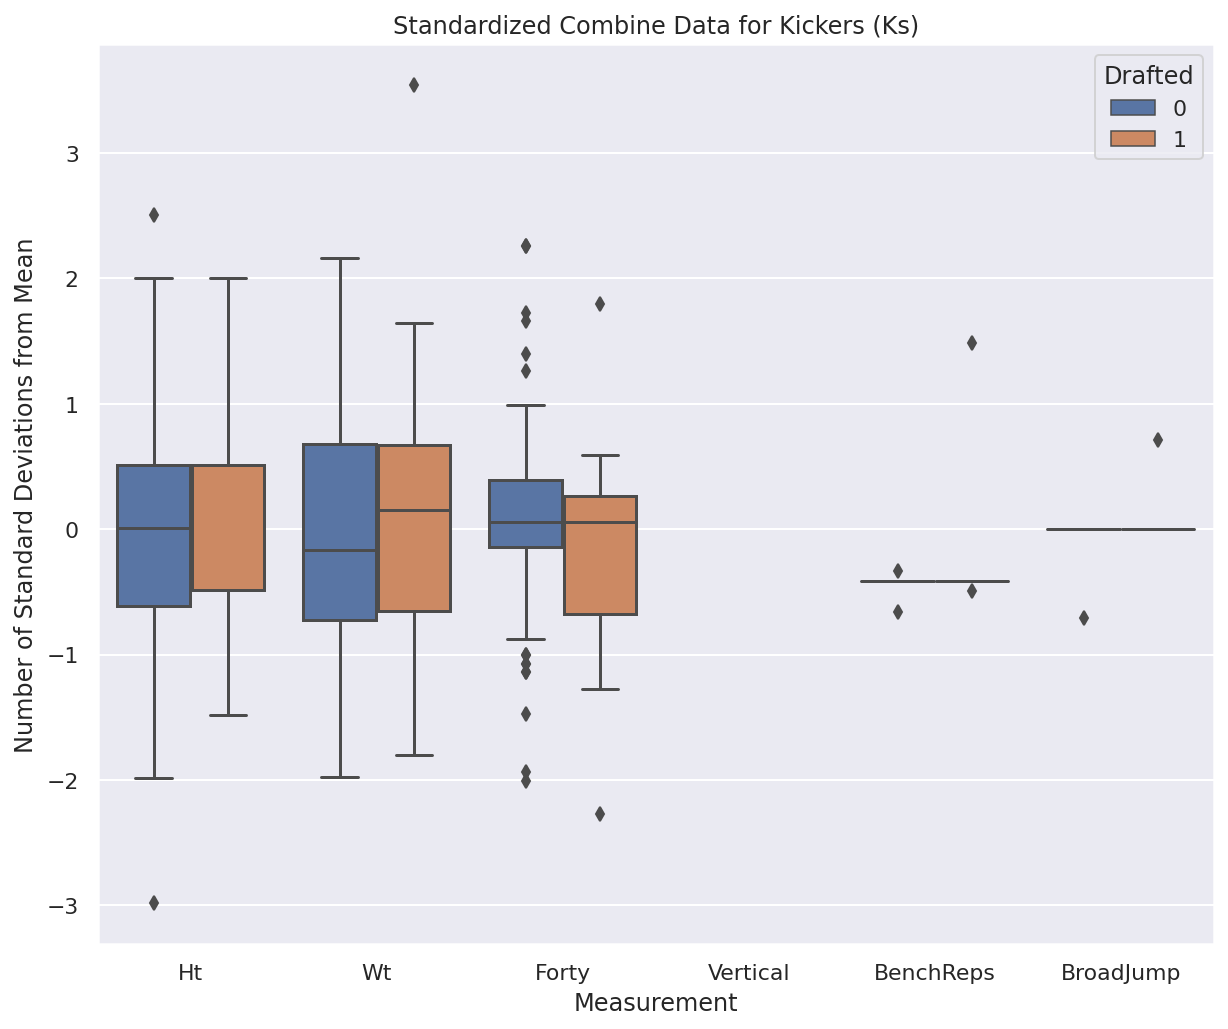

In [52]:
#@title Standardized Combine Data for Ks Boxplot (click to expand)

K_stats = df_K.describe()

df_K = df_K.drop(columns=['Pos', 'Cone', 'Shuttle'])
K_std_columns = df_K.columns

df_K_imputed = imputer.fit_transform(df_K)
df_K_imputed = pd.DataFrame(df_K_imputed, columns=K_std_columns)

for i in range(6):
  mean = K_stats.iloc[1, i]
  std = K_stats.iloc[2, i]
  df_K_imputed.iloc[:,i:(i + 1)] =  (df_K_imputed.iloc[:,i:(i + 1)] - mean) / std

df1_K_sns = df_K_imputed[df_K_imputed['Drafted'] == 1].drop(columns=['Year']).assign(Drafted=1)
df2_K_sns = df_K_imputed[df_K_imputed['Drafted'] == 0].drop(columns=['Year']).assign(Drafted=0)

cdf = pd.concat([df1_K_sns, df2_K_sns])
mdf = pd.melt(cdf, id_vars=['Drafted'], var_name=['Measurement'])

fig, ax = plt.subplots()
ax = sns.boxplot(x="Measurement", 
                 y="value", 
                 hue="Drafted", 
                 data=mdf
).set(ylabel='Number of Standard Deviations from Mean')
sns.set(rc={'figure.figsize':(10,8.27)})
plt.title('Standardized Combine Data for Kickers (Ks)')
plt.show()

# Creating Model

In [0]:
# Splitting original data frame into train/val/test sets. Stratifying by 
# df['Drafted']

train, test = train_test_split(df, stratify=df['Drafted'], test_size=0.2, random_state=7)
train, val = train_test_split(train, stratify=train['Drafted'], test_size=0.2, random_state=7)

In [0]:
# Defining target and feature matrices

target = 'Drafted'

X_train = train.drop(columns=target)
y_train = train[target]

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

In [0]:
# Importing category_encoders, pipeline and model

import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Creating and fitting model pipeline to training set

rf = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)
)

rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Pos'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'Pos', 'data_type': dtype('O'),
                                          'mapping': CB      1
DT      2
LB      3
RB      4
WR      5
DE      6
OT      7
FB      8
TE      9
K      10
S      11
C      12
QB     13
P      14
G      15
NaN    -2
dtype: int64}],
                                return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, f...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                  

In [57]:
# Finding validation accuracy of model

y_pred = rf.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.7165829145728643


In [58]:
# Finding test accuracy of model

y_pred = rf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

Test Accuracy 0.6905144694533762


# Model Accuracy by Position Group

In [0]:
# Splitting position train/val/test sets into feature and target matrices

target = 'Drafted'

X_df_QB_train = df_QB_train.drop(columns=target)
y_df_QB_train = df_QB_train[target]

X_df_QB_val = df_QB_val.drop(columns=target)
y_df_QB_val = df_QB_val[target]

X_df_QB_test = df_QB_test.drop(columns=target)
y_df_QB_test = df_QB_test[target]

In [60]:
rf.fit(X_df_QB_train, y_df_QB_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Pos'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'Pos', 'data_type': dtype('O'),
                                          'mapping': CB      1
DT      2
LB      3
RB      4
WR      5
DE      6
OT      7
FB      8
TE      9
K      10
S      11
C      12
QB     13
P      14
G      15
NaN    -2
dtype: int64}],
                                return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, f...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                  

In [61]:
y_pred = rf.predict(X_df_QB_val)
print('Validation Accuracy', accuracy_score(y_df_QB_val, y_pred))

Validation Accuracy 0.625


In [62]:
y_pred = rf.predict(X_df_QB_test)
print('Test Accuracy', accuracy_score(y_df_QB_test, y_pred))

Test Accuracy 0.6


In [63]:
#@title Splitting RB subset into target and feature matrices. Checking model accuracy for each subset. (click to expand)
X_df_RB_train = df_RB_train.drop(columns=target)
y_df_RB_train = df_RB_train[target]

X_df_RB_val = df_RB_val.drop(columns=target)
y_df_RB_val = df_RB_val[target]

X_df_RB_test = df_RB_test.drop(columns=target)
y_df_RB_test = df_RB_test[target]

rf.fit(X_df_RB_train, y_df_RB_train)

y_pred = rf.predict(X_df_RB_val)
print('Validation Accuracy', accuracy_score(y_df_RB_val, y_pred))

y_pred = rf.predict(X_df_RB_test)
print('Test Accuracy', accuracy_score(y_df_RB_test, y_pred))

Validation Accuracy 0.6551724137931034
Test Accuracy 0.6296296296296297


In [64]:
#@title Splitting FB subset into target and feature matrices. Checking model accuracy for each subset. (click to expand)
X_df_FB_train = df_FB_train.drop(columns=target)
y_df_FB_train = df_FB_train[target]

X_df_FB_val = df_FB_val.drop(columns=target)
y_df_FB_val = df_FB_val[target]

X_df_FB_test = df_FB_test.drop(columns=target)
y_df_FB_test = df_FB_test[target]

rf.fit(X_df_FB_train, y_df_FB_train)

y_pred = rf.predict(X_df_FB_val)
print('Validation Accuracy', accuracy_score(y_df_FB_val, y_pred))

y_pred = rf.predict(X_df_FB_test)
print('Test Accuracy', accuracy_score(y_df_FB_test, y_pred))

Validation Accuracy 0.5789473684210527
Test Accuracy 0.5


In [65]:
#@title Splitting WR subset into target and feature matrices. Checking model accuracy for each subset. (click to expand)
X_df_WR_train = df_WR_train.drop(columns=target)
y_df_WR_train = df_WR_train[target]

X_df_WR_val = df_WR_val.drop(columns=target)
y_df_WR_val = df_WR_val[target]

X_df_WR_test = df_WR_test.drop(columns=target)
y_df_WR_test = df_WR_test[target]

rf.fit(X_df_WR_train, y_df_WR_train)

y_pred = rf.predict(X_df_WR_val)
print('Validation Accuracy', accuracy_score(y_df_WR_val, y_pred))

y_pred = rf.predict(X_df_WR_test)
print('Test Accuracy', accuracy_score(y_df_WR_test, y_pred))

Validation Accuracy 0.7445255474452555
Test Accuracy 0.6976744186046512


In [66]:
#@title Splitting TE subset into target and feature matrices. Checking model accuracy for each subset. (click to expand)
X_df_TE_train = df_TE_train.drop(columns=target)
y_df_TE_train = df_TE_train[target]

X_df_TE_val = df_TE_val.drop(columns=target)
y_df_TE_val = df_TE_val[target]

X_df_TE_test = df_TE_test.drop(columns=target)
y_df_TE_test = df_TE_test[target]

rf.fit(X_df_TE_train, y_df_TE_train)

y_pred = rf.predict(X_df_TE_val)
print('Validation Accuracy', accuracy_score(y_df_TE_val, y_pred))

y_pred = rf.predict(X_df_TE_test)
print('Test Accuracy', accuracy_score(y_df_TE_test, y_pred))

Validation Accuracy 0.8518518518518519
Test Accuracy 0.6470588235294118


In [67]:
#@title Splitting G subset into target and feature matrices. Checking model accuracy for each subset. (click to expand)
X_df_G_train = df_G_train.drop(columns=target)
y_df_G_train = df_G_train[target]

X_df_G_val = df_G_val.drop(columns=target)
y_df_G_val = df_G_val[target]

X_df_G_test = df_G_test.drop(columns=target)
y_df_G_test = df_G_test[target]

rf.fit(X_df_G_train, y_df_G_train)

y_pred = rf.predict(X_df_G_val)
print('Validation Accuracy', accuracy_score(y_df_G_val, y_pred))

y_pred = rf.predict(X_df_G_test)
print('Test Accuracy', accuracy_score(y_df_G_test, y_pred))

Validation Accuracy 0.6885245901639344
Test Accuracy 0.6973684210526315


In [68]:
#@title Splitting T subset into target and feature matrices. Checking model accuracy for each subset. (click to expand)
X_df_T_train = df_T_train.drop(columns=target)
y_df_T_train = df_T_train[target]

X_df_T_val = df_T_val.drop(columns=target)
y_df_T_val = df_T_val[target]

X_df_T_test = df_T_test.drop(columns=target)
y_df_T_test = df_T_test[target]

rf.fit(X_df_T_train, y_df_T_train)

y_pred = rf.predict(X_df_T_val)
print('Validation Accuracy', accuracy_score(y_df_T_val, y_pred))

y_pred = rf.predict(X_df_T_test)
print('Test Accuracy', accuracy_score(y_df_T_test, y_pred))

Validation Accuracy 0.7432432432432432
Test Accuracy 0.7096774193548387


In [69]:
#@title Splitting C subset into target and feature matrices. Checking model accuracy for each subset. (click to expand)
X_df_C_train = df_C_train.drop(columns=target)
y_df_C_train = df_C_train[target]

X_df_C_val = df_C_val.drop(columns=target)
y_df_C_val = df_C_val[target]

X_df_C_test = df_C_test.drop(columns=target)
y_df_C_test = df_C_test[target]

rf.fit(X_df_C_train, y_df_C_train)

y_pred = rf.predict(X_df_C_val)
print('Validation Accuracy', accuracy_score(y_df_C_val, y_pred))

y_pred = rf.predict(X_df_C_test)
print('Test Accuracy', accuracy_score(y_df_C_test, y_pred))

Validation Accuracy 0.6428571428571429
Test Accuracy 0.5714285714285714


In [70]:
#@title Splitting DT subset into target and feature matrices. Checking model accuracy for each subset. (click to expand)
X_df_DT_train = df_DT_train.drop(columns=target)
y_df_DT_train = df_DT_train[target]

X_df_DT_val = df_DT_val.drop(columns=target)
y_df_DT_val = df_DT_val[target]

X_df_DT_test = df_DT_test.drop(columns=target)
y_df_DT_test = df_DT_test[target]

rf.fit(X_df_DT_train, y_df_DT_train)

y_pred = rf.predict(X_df_DT_val)
print('Validation Accuracy', accuracy_score(y_df_DT_val, y_pred))

y_pred = rf.predict(X_df_DT_test)
print('Test Accuracy', accuracy_score(y_df_DT_test, y_pred))

Validation Accuracy 0.72
Test Accuracy 0.7021276595744681


In [71]:
#@title Splitting DE subset into target and feature matrices. Checking model accuracy for each subset. (click to expand)
X_df_DE_train = df_DE_train.drop(columns=target)
y_df_DE_train = df_DE_train[target]

X_df_DE_val = df_DE_val.drop(columns=target)
y_df_DE_val = df_DE_val[target]

X_df_DE_test = df_DE_test.drop(columns=target)
y_df_DE_test = df_DE_test[target]

rf.fit(X_df_DE_train, y_df_DE_train)

y_pred = rf.predict(X_df_DE_val)
print('Validation Accuracy', accuracy_score(y_df_DE_val, y_pred))

y_pred = rf.predict(X_df_DE_test)
print('Test Accuracy', accuracy_score(y_df_DE_test, y_pred))

Validation Accuracy 0.7317073170731707
Test Accuracy 0.7352941176470589


In [72]:
#@title Splitting LB subset into target and feature matrices. Checking model accuracy for each subset. (click to expand)
X_df_LB_train = df_LB_train.drop(columns=target)
y_df_LB_train = df_LB_train[target]

X_df_LB_val = df_LB_val.drop(columns=target)
y_df_LB_val = df_LB_val[target]

X_df_LB_test = df_LB_test.drop(columns=target)
y_df_LB_test = df_LB_test[target]

rf.fit(X_df_LB_train, y_df_LB_train)

y_pred = rf.predict(X_df_LB_val)
print('Validation Accuracy', accuracy_score(y_df_LB_val, y_pred))

y_pred = rf.predict(X_df_LB_test)
print('Test Accuracy', accuracy_score(y_df_LB_test, y_pred))

Validation Accuracy 0.6637168141592921
Test Accuracy 0.7446808510638298


In [73]:
#@title Splitting CB subset into target and feature matrices. Checking model accuracy for each subset. (click to expand)
X_df_CB_train = df_CB_train.drop(columns=target)
y_df_CB_train = df_CB_train[target]

X_df_CB_val = df_CB_val.drop(columns=target)
y_df_CB_val = df_CB_val[target]

X_df_CB_test = df_CB_test.drop(columns=target)
y_df_CB_test = df_CB_test[target]

rf.fit(X_df_CB_train, y_df_CB_train)

y_pred = rf.predict(X_df_CB_val)
print('Validation Accuracy', accuracy_score(y_df_CB_val, y_pred))

y_pred = rf.predict(X_df_CB_test)
print('Test Accuracy', accuracy_score(y_df_CB_test, y_pred))

Validation Accuracy 0.8118811881188119
Test Accuracy 0.7480314960629921


In [74]:
#@title Splitting S subset into target and feature matrices. Checking model accuracy for each subset. (click to expand)
X_df_S_train = df_S_train.drop(columns=target)
y_df_S_train = df_S_train[target]

X_df_S_val = df_S_val.drop(columns=target)
y_df_S_val = df_S_val[target]

X_df_S_test = df_S_test.drop(columns=target)
y_df_S_test = df_S_test[target]

rf.fit(X_df_S_train, y_df_S_train)

y_pred = rf.predict(X_df_S_val)
print('Validation Accuracy', accuracy_score(y_df_S_val, y_pred))

y_pred = rf.predict(X_df_S_test)
print('Test Accuracy', accuracy_score(y_df_S_test, y_pred))

Validation Accuracy 0.7088607594936709
Test Accuracy 0.6836734693877551


In [75]:
#@title Splitting P subset into target and feature matrices. Checking model accuracy for each subset. (click to expand)
X_df_P_train = df_P_train.drop(columns=target)
y_df_P_train = df_P_train[target]

X_df_P_val = df_P_val.drop(columns=target)
y_df_P_val = df_P_val[target]

X_df_P_test = df_P_test.drop(columns=target)
y_df_P_test = df_P_test[target]

rf.fit(X_df_P_train, y_df_P_train)

y_pred = rf.predict(X_df_P_val)
print('Validation Accuracy', accuracy_score(y_df_P_val, y_pred))

y_pred = rf.predict(X_df_P_test)
print('Test Accuracy', accuracy_score(y_df_P_test, y_pred))

Validation Accuracy 0.7
Test Accuracy 0.6666666666666666


In [76]:
#@title Splitting K subset into target and feature matrices. Checking model accuracy for each subset. (click to expand)
X_df_K_train = df_K_train.drop(columns=target)
y_df_K_train = df_K_train[target]

X_df_K_val = df_K_val.drop(columns=target)
y_df_K_val = df_K_val[target]

X_df_K_test = df_K_test.drop(columns=target)
y_df_K_test = df_K_test[target]

rf.fit(X_df_K_train, y_df_K_train)

y_pred = rf.predict(X_df_K_val)
print('Validation Accuracy', accuracy_score(y_df_K_val, y_pred))

y_pred = rf.predict(X_df_K_test)
print('Test Accuracy', accuracy_score(y_df_K_test, y_pred))

Validation Accuracy 0.5
Test Accuracy 0.7058823529411765


# Permutation Importances (Overall)

In [77]:
# Manipulating data to work with eli5 in order to ultimately extract
# permutation importances for entire overall dataframe

transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [78]:
pip install eli5

In [79]:
# Defining and fitting permuter to validation set

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=7
)

permuter.fit(X_val_transformed, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [80]:
# Creating series of feature names and permutation importances

feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

BroadJump   -0.002010
Vertical     0.005226
Shuttle      0.007035
Pos          0.007437
BenchReps    0.011055
Ht           0.011457
Cone         0.019497
Year         0.052663
Wt           0.074573
Forty        0.101307
dtype: float64

In [81]:
# Graphic representation of permutation importances

eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.1013 ± 0.0229,Forty
0.0746 ± 0.0065,Wt
0.0527 ± 0.0135,Year
0.0195 ± 0.0097,Cone
0.0115 ± 0.0055,Ht
0.0111 ± 0.0181,BenchReps
0.0074 ± 0.0052,Pos
0.0070 ± 0.0067,Shuttle
0.0052 ± 0.0121,Vertical
-0.0020 ± 0.0075,BroadJump


# Permutation Importances (By Postion)

In [82]:
#@title Permutation Importances for QBs (click to expand)
# Same steps as above, just subset by position

X_df_QB_train_transformed = transformers.fit_transform(X_df_QB_train)
X_df_QB_val_transformed = transformers.transform(X_df_QB_val)

model = RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)
model.fit(X_df_QB_train_transformed, y_df_QB_train)

permuter.fit(X_df_QB_val_transformed, y_df_QB_val)

feature_names = X_df_QB_val.columns.tolist()

pd.Series(permuter.feature_importances_, feature_names).sort_values()
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.1286 ± 0.0525,Year
0.0714 ± 0.0749,Wt
0.0607 ± 0.0535,Forty
0.0500 ± 0.0267,Cone
0.0393 ± 0.0267,Ht
0.0286 ± 0.0175,Vertical
0.0143 ± 0.0416,BenchReps
0.0071 ± 0.0175,BroadJump
0.0000 ± 0.0452,Shuttle
0 ± 0.0000,Pos


In [83]:
#@title Permutation Importances for RBs (click to expand)

X_df_RB_train_transformed = transformers.fit_transform(X_df_RB_train)
X_df_RB_val_transformed = transformers.transform(X_df_RB_val)

model = RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)
model.fit(X_df_RB_train_transformed, y_df_RB_train)

permuter.fit(X_df_RB_val_transformed, y_df_RB_val)

feature_names = X_df_RB_val.columns.tolist()

pd.Series(permuter.feature_importances_, feature_names).sort_values()
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.1402 ± 0.0368,Forty
0.0989 ± 0.0374,Year
0.0805 ± 0.0582,Wt
0.0506 ± 0.0450,Shuttle
0.0460 ± 0.0252,BenchReps
0.0414 ± 0.0184,Cone
0.0368 ± 0.0172,BroadJump
0.0253 ± 0.0446,Vertical
0.0184 ± 0.0234,Ht
0 ± 0.0000,Pos


In [84]:
#@title Permutation Importances for FBs (click to expand)

X_df_FB_train_transformed = transformers.fit_transform(X_df_FB_train)
X_df_FB_val_transformed = transformers.transform(X_df_FB_val)

model = RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)
model.fit(X_df_FB_train_transformed, y_df_FB_train)

permuter.fit(X_df_FB_val_transformed, y_df_FB_val)

feature_names = X_df_FB_val.columns.tolist()

pd.Series(permuter.feature_importances_, feature_names).sort_values()
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0842 ± 0.0842,Forty
0.0737 ± 0.0516,Ht
0.0632 ± 0.0788,Vertical
0.0421 ± 0.0788,Year
0.0421 ± 0.0421,BroadJump
0.0316 ± 0.1428,BenchReps
0.0211 ± 0.0842,Cone
0 ± 0.0000,Pos
-0.0105 ± 0.0421,Wt
-0.0211 ± 0.0516,Shuttle


In [85]:
#@title Permutation Importances for WRs (click to expand)

X_df_WR_train_transformed = transformers.fit_transform(X_df_WR_train)
X_df_WR_val_transformed = transformers.transform(X_df_WR_val)

model = RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)
model.fit(X_df_WR_train_transformed, y_df_WR_train)

permuter.fit(X_df_WR_val_transformed, y_df_WR_val)

feature_names = X_df_WR_val.columns.tolist()

pd.Series(permuter.feature_importances_, feature_names).sort_values()
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.1620 ± 0.0338,Forty
0.0686 ± 0.0353,Year
0.0672 ± 0.0283,Wt
0.0394 ± 0.0340,Cone
0.0350 ± 0.0234,Vertical
0.0336 ± 0.0271,BroadJump
0.0234 ± 0.0251,Shuttle
0.0161 ± 0.0170,Ht
0.0102 ± 0.0198,BenchReps
0 ± 0.0000,Pos


In [86]:
#@title Permutation Importances for TEs (click to expand)

X_df_TE_train_transformed = transformers.fit_transform(X_df_TE_train)
X_df_TE_val_transformed = transformers.transform(X_df_TE_val)

model = RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)
model.fit(X_df_TE_train_transformed, y_df_TE_train)

permuter.fit(X_df_TE_val_transformed, y_df_TE_val)

feature_names = X_df_TE_val.columns.tolist()

pd.Series(permuter.feature_importances_, feature_names).sort_values()
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.1037 ± 0.0687,Year
0.0852 ± 0.0181,Forty
0.0556 ± 0.0663,BenchReps
0.0259 ± 0.0181,Cone
0.0185 ± 0.0234,Shuttle
0.0148 ± 0.0432,BroadJump
0.0037 ± 0.0432,Vertical
0 ± 0.0000,Pos
-0.0222 ± 0.0432,Wt
-0.0444 ± 0.0602,Ht


In [87]:
#@title Permutation Importances for Gs (click to expand)

X_df_G_train_transformed = transformers.fit_transform(X_df_G_train)
X_df_G_val_transformed = transformers.transform(X_df_G_val)

model = RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)
model.fit(X_df_G_train_transformed, y_df_G_train)

permuter.fit(X_df_G_val_transformed, y_df_G_val)

feature_names = X_df_G_val.columns.tolist()

pd.Series(permuter.feature_importances_, feature_names).sort_values()
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.1115 ± 0.0525,Year
0.0393 ± 0.0572,Forty
0.0328 ± 0.0464,Wt
0.0262 ± 0.0445,BenchReps
0.0066 ± 0.0334,Ht
0.0000 ± 0.0293,BroadJump
0 ± 0.0000,Pos
-0.0066 ± 0.0334,Cone
-0.0066 ± 0.0262,Vertical
-0.0230 ± 0.0262,Shuttle


In [88]:
#@title Permutation Importances for Ts (click to expand)

X_df_T_train_transformed = transformers.fit_transform(X_df_T_train)
X_df_T_val_transformed = transformers.transform(X_df_T_val)

model = RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)
model.fit(X_df_T_train_transformed, y_df_T_train)

permuter.fit(X_df_T_val_transformed, y_df_T_val)

feature_names = X_df_T_val.columns.tolist()

pd.Series(permuter.feature_importances_, feature_names).sort_values()
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0784 ± 0.0397,Year
0.0676 ± 0.0171,Forty
0.0243 ± 0.0315,Cone
0.0216 ± 0.0132,Ht
0.0189 ± 0.0405,BenchReps
0.0162 ± 0.0202,Wt
0.0135 ± 0.0171,Vertical
0.0108 ± 0.0108,Shuttle
0.0081 ± 0.0132,BroadJump
0 ± 0.0000,Pos


In [89]:
#@title Permutation Importances for Cs (click to expand)

X_df_C_train_transformed = transformers.fit_transform(X_df_C_train)
X_df_C_val_transformed = transformers.transform(X_df_C_val)

model = RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)
model.fit(X_df_C_train_transformed, y_df_C_train)

permuter.fit(X_df_C_val_transformed, y_df_C_val)

feature_names = X_df_C_val.columns.tolist()

pd.Series(permuter.feature_importances_, feature_names).sort_values()
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0786 ± 0.0948,Cone
0.0643 ± 0.0535,Ht
0.0571 ± 0.0728,Shuttle
0.0571 ± 0.1069,Wt
0.0500 ± 0.1069,BenchReps
0.0286 ± 0.1229,Forty
0.0214 ± 0.0571,Year
0.0143 ± 0.0350,BroadJump
0.0071 ± 0.1385,Vertical
0 ± 0.0000,Pos


In [90]:
#@title Permutation Importances for DTs (click to expand)

X_df_DT_train_transformed = transformers.fit_transform(X_df_DT_train)
X_df_DT_val_transformed = transformers.transform(X_df_DT_val)

model = RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)
model.fit(X_df_DT_train_transformed, y_df_DT_train)

permuter.fit(X_df_DT_val_transformed, y_df_DT_val)

feature_names = X_df_DT_val.columns.tolist()

pd.Series(permuter.feature_importances_, feature_names).sort_values()
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.1147 ± 0.0213,Year
0.0587 ± 0.0465,Wt
0.0507 ± 0.0261,BenchReps
0.0453 ± 0.0272,Forty
0.0320 ± 0.0131,Ht
0.0240 ± 0.0261,BroadJump
0.0187 ± 0.0131,Shuttle
0.0187 ± 0.0131,Cone
0.0053 ± 0.0272,Vertical
0 ± 0.0000,Pos


In [91]:
#@title Permutation Importances for DEs (click to expand)

X_df_DE_train_transformed = transformers.fit_transform(X_df_DE_train)
X_df_DE_val_transformed = transformers.transform(X_df_DE_val)

model = RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)
model.fit(X_df_DE_train_transformed, y_df_DE_train)

permuter.fit(X_df_DE_val_transformed, y_df_DE_val)

feature_names = X_df_DE_val.columns.tolist()

pd.Series(permuter.feature_importances_, feature_names).sort_values()
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0780 ± 0.0396,Year
0.0561 ± 0.0452,Forty
0.0366 ± 0.0267,Cone
0.0220 ± 0.0098,Ht
0.0146 ± 0.0473,BenchReps
0.0122 ± 0.0154,Vertical
0.0049 ± 0.0119,Shuttle
0.0049 ± 0.0249,BroadJump
0.0024 ± 0.0098,Wt
0 ± 0.0000,Pos


In [92]:
#@title Permutation Importances for LBs (click to expand)

X_df_LB_train_transformed = transformers.fit_transform(X_df_LB_train)
X_df_LB_val_transformed = transformers.transform(X_df_LB_val)

model = RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)
model.fit(X_df_LB_train_transformed, y_df_LB_train)

permuter.fit(X_df_LB_val_transformed, y_df_LB_val)

feature_names = X_df_LB_val.columns.tolist()

pd.Series(permuter.feature_importances_, feature_names).sort_values()
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.0584 ± 0.0288,Forty
0.0531 ± 0.0592,BenchReps
0.0513 ± 0.0206,Year
0.0195 ± 0.0305,BroadJump
0.0142 ± 0.0180,Shuttle
0.0088 ± 0.0158,Cone
0.0088 ± 0.0112,Ht
0.0018 ± 0.0071,Wt
0 ± 0.0000,Pos
-0.0035 ± 0.0212,Vertical


In [93]:
#@title Permutation Importances for CBs (click to expand)

X_df_CB_train_transformed = transformers.fit_transform(X_df_CB_train)
X_df_CB_val_transformed = transformers.transform(X_df_CB_val)

model = RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)
model.fit(X_df_CB_train_transformed, y_df_CB_train)

permuter.fit(X_df_CB_val_transformed, y_df_CB_val)

feature_names = X_df_CB_val.columns.tolist()

pd.Series(permuter.feature_importances_, feature_names).sort_values()
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.1109 ± 0.0423,Forty
0.0950 ± 0.0322,Year
0.0396 ± 0.0217,BenchReps
0.0218 ± 0.0231,Vertical
0.0158 ± 0.0202,BroadJump
0.0139 ± 0.0202,Wt
0.0059 ± 0.0158,Ht
0 ± 0.0000,Pos
-0.0020 ± 0.0384,Cone
-0.0040 ± 0.0158,Shuttle


In [94]:
#@title Permutation Importances for Ss (click to expand)

X_df_S_train_transformed = transformers.fit_transform(X_df_S_train)
X_df_S_val_transformed = transformers.transform(X_df_S_val)

model = RandomForestClassifier(n_estimators=500, random_state=7, n_jobs=-1)
model.fit(X_df_S_train_transformed, y_df_S_train)

permuter.fit(X_df_S_val_transformed, y_df_S_val)

feature_names = X_df_S_val.columns.tolist()

pd.Series(permuter.feature_importances_, feature_names).sort_values()
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.1722 ± 0.1246,Forty
0.0835 ± 0.0652,Year
0.0557 ± 0.0304,BenchReps
0.0481 ± 0.0189,Wt
0.0405 ± 0.0248,BroadJump
0.0354 ± 0.0189,Cone
0.0354 ± 0.0336,Vertical
0.0152 ± 0.0189,Shuttle
0.0025 ± 0.0101,Ht
0 ± 0.0000,Pos


# Linear Regression?

In [0]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

In [0]:
train_linear, test_linear = train_test_split(df, stratify=df['Drafted'], 
                                                  test_size=0.2, random_state=7)

In [0]:
features = ['Forty', 'Wt']

X_train_linear = train_linear[features]
y_train_linear = train_linear['Drafted']

X_test_linear = test_linear[features]
y_test_linear = test_linear['Drafted']

In [0]:
X_train_linear = imputer.fit_transform(X_train_linear)
X_test_linear = imputer.transform(X_test_linear)

In [113]:
linear.fit(X_train_linear, y_train_linear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_linear_pred = linear.predict(X_test_linear)

In [120]:
accuracy = linear.score(X_test_linear,y_test_linear)
print(accuracy*100,'%')

8.90760989684095 %


Big oof. I didn't see that a linear regression was required until I was turning in the sprint retro